# Graphiques du Tableau pour Cerlico : Entités nommées

### Importation des modules

- pickle pour la récupération des données de Conscila
- pandas pour la gestion des csv et les calculs type excel
- numpy pour les calculs en général
- matplotlib pour les graphiques

In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy,datetime,pickle,re,codecs,unidecode
import io
from lxml import etree
from IPython.display import display

In [375]:
pd.__version__

u'0.23.1'

In [376]:
%matplotlib inline

In [379]:
import seaborn as sns
sns.set(style="ticks")
sns.set_style("whitegrid")
sns.set_palette("husl")
#sns.palplot(sns.color_palette("hls", 20))
sns.set_context("talk")
#sns.set_context("notebook")
#sns.set_context("paper")

In [380]:
spkNoms={"spk1":"journaliste","spk2":"expert","spk3":"terrain"}
equipesDrapeau={"=Fr":u"🇫🇷","=Ar":u"🇦🇷"}

In [381]:
with open("partieGlobale.pkl","rb") as inFile:
    dfComplet=pickle.load(inFile)

In [382]:
dfComplet["excitation"]=pd.to_numeric(dfComplet["excitation"], errors='coerce')
dfComplet["début"]=pd.to_numeric(dfComplet["début"], errors='coerce')
dfComplet["fin"]=pd.to_numeric(dfComplet["fin"], errors='coerce')

In [383]:
dfTest=dfComplet["Spk noms joueurs texte-PxP texte-colour discours excitation".split(" ")]
dfTest[(dfTest["noms"].notnull())&(dfTest["texte-PxP"].notnull())&(dfTest["Spk"]=="spk2")].groupby(["joueurs","noms"])[["texte-PxP"]].count()

texte-PxP
joueurs                                            noms                              
Agustín Pichot=Ar                                  Agustin Pichot                   1
Christophe Dominici=Fr                             Dominici                         1
Cédric Heymans=Fr                                  Heymans                          1
Damien Traille=Fr                                  Traille                          2
Damien Traille=Fr;Rémy Martin=Fr                   Traille,Rémy Martin              1
David Skrela=Fr                                    Skrela                           2
Juan Martín Hernández=Ar                           Hernandez                        1
Lucas Borges=Ar                                    Borges                           1
Manuel Contepomi=Ar;Felipe Contepomi=Ar            Contepomi                        1
Mario Ledesma=Ar                                   Ledesma                          1
Pierre Mignoni=Fr                                  Mignoni                          1
Pieter de Villiers=Fr                              Pieter de Villiers               1
Raphaël Ibañez=Fr                                  Ibañez                           2
Rémy Martin=Fr                                     Rémy                             1
                                                   Rémy Martin                      2
                                                   Rémy Martin,Rémy Martin          1
Rémy Martin=Fr;Martín Schusterman=Ar;Juan Martí... Martin                           4
Serge Betsen=Fr                                    Betsen                           1
Sébastien Chabal=Fr                                Chabal                           1

## Interpolation des valeurs numériques

In [384]:
dfMatch=dfComplet.iloc[:15700].set_index("timeline")
for c in ["excitation","RJ5.00","D5.00","V5.00"]+"S1D5.00 S2D5.00 S3D5.00 V5.00 S1V5.00 S2V5.00 S3V5.00".split(" "):
    dfMatch[c]=dfMatch[c].interpolate(method="index")

## Remise à zéro des valeurs numériques pendant la mi-temps

In [385]:
for c in ["excitation","RJ5.00","D5.00","V5.00"]+"S1D5.00 S2D5.00 S3D5.00 V5.00 S1V5.00 S2V5.00 S3V5.00".split(" "): 
    dfMatch.loc[(dfMatch.index>271985)&(dfMatch.index<325843),c]=0

In [386]:
dfMatch[((dfMatch.index>271985)&(dfMatch.index<325843))][["excitation","RJ5.00"]]
#dfMatch.columns

excitation  RJ5.00
timeline                    
272000.0         0.0     0.0
272100.0         0.0     0.0
272200.0         0.0     0.0
272300.0         0.0     0.0
272400.0         0.0     0.0
272500.0         0.0     0.0
272600.0         0.0     0.0
272700.0         0.0     0.0
272800.0         0.0     0.0
272900.0         0.0     0.0
273000.0         0.0     0.0
273100.0         0.0     0.0
273200.0         0.0     0.0
273300.0         0.0     0.0
273400.0         0.0     0.0
273500.0         0.0     0.0
273600.0         0.0     0.0
273700.0         0.0     0.0
273800.0         0.0     0.0
273900.0         0.0     0.0
274000.0         0.0     0.0
274100.0         0.0     0.0
274200.0         0.0     0.0
274300.0         0.0     0.0
274400.0         0.0     0.0
274500.0         0.0     0.0
274600.0         0.0     0.0
274700.0         0.0     0.0
274800.0         0.0     0.0
274900.0         0.0     0.0
...              ...     ...
322900.0         0.0     0.0
323000.0         0.0     0.0
323100.0         0.0     0.0
323200.0         0.0     0.0
323300.0         0.0     0.0
323400.0         0.0     0.0
323500.0         0.0     0.0
323600.0         0.0     0.0
323700.0         0.0     0.0
323800.0         0.0     0.0
323900.0         0.0     0.0
324000.0         0.0     0.0
324100.0         0.0     0.0
324200.0         0.0     0.0
324300.0         0.0     0.0
324400.0         0.0     0.0
324500.0         0.0     0.0
324600.0         0.0     0.0
324700.0         0.0     0.0
324800.0         0.0     0.0
324900.0         0.0     0.0
325000.0         0.0     0.0
325100.0         0.0     0.0
325200.0         0.0     0.0
325300.0         0.0     0.0
325400.0         0.0     0.0
325500.0         0.0     0.0
325600.0         0.0     0.0
325700.0         0.0     0.0
325800.0         0.0     0.0

[539 rows x 2 columns]

# Traitement des corrections manuelles des Entités nommées
- quelques corrections supplémentaires dans le XLS-CM directement par GB

In [387]:
dfXLS=pd.read_excel("partieGlobale-Joueurs-CM.xlsx")

In [388]:
dfNomsXLS=dfXLS[dfXLS["joueurs"].notnull()].set_index("timeline")[["noms","joueurs"]]

In [389]:
dfMatch.update(dfNomsXLS)

In [390]:
selectColonnesNoms="Spk noms joueurs excitation émotion discours texte texte-PxP texte-colour début fin RJ5.00 D5.00 S1D5.00".split(" ")
dfNomsMatch=dfMatch[selectColonnesNoms]

In [391]:
dfNomsMatch[dfNomsMatch["joueurs"].notnull()][["Spk","joueurs","début","fin","discours"]]

Spk                                          joueurs    début  \
timeline                                                                   
3616.0    spk1                                  David Skrela=Fr    36.16   
4232.0    spk1                               Rodrigo Roncero=Ar    42.32   
4456.0    spk1                                Agustín Pichot=Ar    44.56   
4656.0    spk1                         Juan Martín Hernández=Ar    46.56   
7144.0    spk1                                Raphaël Ibañez=Fr    71.44   
8120.0    spk1                                Agustín Pichot=Ar    81.20   
8472.0    spk1                                Cédric Heymans=Fr    84.72   
8844.0    spk1                                Agustín Pichot=Ar    88.44   
9092.0    spk1                                Cédric Heymans=Fr    90.92   
9596.0    spk1                                  David Skrela=Fr    95.96   
9920.0    spk3                               Thierry Gilardi=Ot    99.20   
10000.0   spk2                                Agustín Pichot=Ar   100.00   
11104.0   spk2                                Cédric Heymans=Fr   111.04   
11740.0   spk2                                 Mario Ledesma=Ar   117.40   
11872.0   spk1                                 Mario Ledesma=Ar   118.72   
13568.0   spk1                                 Mario Ledesma=Ar   135.68   
14360.0   spk1                         Juan Martín Hernández=Ar   143.60   
14744.0   spk1                                Cédric Heymans=Fr   147.44   
16056.0   spk1                         Juan Martín Hernández=Ar   160.56   
16480.0   spk1                                Cédric Heymans=Fr   164.80   
18164.0   spk2                         Juan Martín Hernández=Ar   181.64   
19068.0   spk1                                 Mario Ledesma=Ar   190.68   
19872.0   spk1                                   Rémy Martin=Fr   198.72   
20468.0   spk1                             Patricio Albacete=Ar   204.68   
20716.0   spk1                   Juan Martín Fernández Lobbe=Ar   207.16   
21956.0   spk1                         Juan Martín Hernández=Ar   219.56   
22336.0   spk1  Christophe Dominici=Fr;Juan Martín Hernández=Ar   223.36   
23160.0   spk1                                Pierre Mignoni=Fr   231.60   
23464.0   spk1                            Pieter de Villiers=Fr   234.64   
23808.0   spk1                            Pieter de Villiers=Fr   238.08   
...        ...                                              ...      ...   
577614.0  spk1                            Dimitri Szarzewski=Fr  5776.14   
580710.0  spk1                                 Fabien Pelous=Fr  5807.10   
580858.0  spk1               Fabien Pelous=Fr;Raphaël Ibañez=Fr  5808.58   
582162.0  spk1                              Sébastien Chabal=Fr  5821.62   
583170.0  spk1                                Agustín Pichot=Ar  5831.70   
583262.0  spk1                         Juan Martín Hernández=Ar  5832.62   
583430.0  spk1                            Dimitri Szarzewski=Fr  5834.30   
583722.0  spk2                              Sébastien Chabal=Fr  5837.22   
583778.0  spk1                              Sébastien Chabal=Fr  5837.78   
584082.0  spk1                                  Serge Betsen=Fr  5840.82   
584586.0  spk1                                  Serge Betsen=Fr  5845.86   
584658.0  spk2                                  Serge Betsen=Fr  5846.58   
584849.0  spk2                              Sébastien Chabal=Fr  5848.49   
585766.0  spk2                                  Serge Betsen=Fr  5857.66   
586310.0  spk2                              Sébastien Chabal=Fr  5863.10   
586745.0  spk3                Raphaël Ibañez=Fr;Serge Betsen=Fr  5867.45   
587162.0  spk3                                  David Skrela=Fr  5871.62   
587478.0  spk1                              Fabrice Landreau=Ot  5874.78   
588014.0  spk1                                  David Skrela=Fr  5880.14   
588470.0  spk1               Fabien Pelous=Fr;Raphaël Ibañe

In [653]:
rythmeCuts=range(9)
dfNomsMatch.loc[(dfNomsMatch["joueurs"].notnull()),"RJ5"]=pd.to_numeric(pd.cut(dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][u"RJ5.00"],rythmeCuts,include_lowest=True,labels=rythmeCuts[:-1]), errors='coerce')
dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][["RJ5"]]

RJ5
timeline     
3616.0    0.0
4232.0    2.0
4456.0    3.0
4656.0    4.0
7144.0    0.0
8120.0    3.0
8472.0    3.0
8844.0    4.0
9092.0    2.0
9596.0    3.0
9920.0    2.0
10000.0   2.0
11104.0   0.0
11740.0   0.0
11872.0   0.0
13568.0   2.0
14360.0   2.0
14744.0   2.0
16056.0   0.0
16480.0   0.0
18164.0   0.0
19068.0   0.0
19872.0   0.0
20468.0   3.0
20716.0   4.0
21956.0   1.0
22336.0   2.0
23160.0   2.0
23464.0   3.0
23808.0   3.0
...       ...
577614.0  4.0
580710.0  0.0
580858.0  0.0
582162.0  6.0
583170.0  2.0
583262.0  2.0
583430.0  1.0
583722.0  1.0
583778.0  2.0
584082.0  3.0
584586.0  4.0
584658.0  3.0
584849.0  3.0
585766.0  3.0
586310.0  1.0
586745.0  2.0
587162.0  3.0
587478.0  3.0
588014.0  0.0
588470.0  0.0
588658.0  0.0
590018.0  3.0
590926.0  1.0
591322.0  3.0
591686.0  4.0
593066.0  4.0
593562.0  4.0
593658.0  4.0
593710.0  3.0
594530.0  1.0

[546 rows x 1 columns]

In [660]:
debitCuts=range(9)
dfNomsMatch.loc[(dfNomsMatch["joueurs"].notnull()),"D5"]=pd.to_numeric(pd.cut(dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][u"D5.00"],debitCuts,include_lowest=True,labels=debitCuts[:-1]), errors='coerce')
dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][["D5"]]

D5
timeline     
3616.0    3.0
4232.0    3.0
4456.0    3.0
4656.0    2.0
7144.0    2.0
8120.0    3.0
8472.0    3.0
8844.0    3.0
9092.0    3.0
9596.0    3.0
9920.0    3.0
10000.0   4.0
11104.0   5.0
11740.0   6.0
11872.0   5.0
13568.0   2.0
14360.0   3.0
14744.0   3.0
16056.0   2.0
16480.0   3.0
18164.0   4.0
19068.0   4.0
19872.0   4.0
20468.0   3.0
20716.0   2.0
21956.0   3.0
22336.0   3.0
23160.0   2.0
23464.0   2.0
23808.0   3.0
...       ...
577614.0  3.0
580710.0  1.0
580858.0  1.0
582162.0  2.0
583170.0  1.0
583262.0  1.0
583430.0  1.0
583722.0  3.0
583778.0  3.0
584082.0  4.0
584586.0  4.0
584658.0  3.0
584849.0  3.0
585766.0  3.0
586310.0  4.0
586745.0  4.0
587162.0  2.0
587478.0  3.0
588014.0  5.0
588470.0  5.0
588658.0  4.0
590018.0  2.0
590926.0  3.0
591322.0  2.0
591686.0  2.0
593066.0  2.0
593562.0  2.0
593658.0  2.0
593710.0  2.0
594530.0  2.0

[546 rows x 1 columns]

In [392]:
setJoueurs=set()
for j in list(dfMatch[dfMatch["joueurs"].notnull()]["joueurs"].unique()):
    if j=="":
        pass
    elif ";" in j:
        for lJ in j.split(";"):
            setJoueurs.add(lJ)
    else:
        setJoueurs.add(j)
setJoueurs

{u'Agust\xedn Pichot=Ar',
 u'Aur\xe9lien Rougerie=Fr',
 u'Bernard Laporte=Fr',
 u'Christophe Dominici=Fr',
 u'C\xe9dric Heymans=Fr',
 u'Damien Traille=Fr',
 u'David Ellis=En',
 u'David Skrela=Fr',
 u'Dimitri Szarzewski=Fr',
 u'Fabien Pelous=Fr',
 u'Fabrice Landreau=Ot',
 u'Felipe Contepomi=Ar',
 u'Fr\xe9d\xe9ric Michalak=Fr',
 u'Hern\xe1n Senillosa=Ar',
 u'Ignacio Corleto=Ar',
 u'Ignacio Fern\xe1ndez Lobbe=Ar',
 u'Imanol Harinordoquy=Fr',
 u'Jean-Baptiste Poux=Fr',
 u'Jean-Baptiste \xc9lissalde=Fr',
 u'Jo Maso=Fr',
 u'Juan Manuel Leguizam\xf3n=Ar',
 u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar',
 u'Juan Mart\xedn Hern\xe1ndez=Ar',
 u'Julien Bonnaire=Fr',
 u'J\xe9r\xf4me Thion=Fr',
 u'Lucas Borges=Ar',
 u'Lucas Ostiglia=Ar',
 u'Manuel Contepomi=Ar',
 u'Marcelo Loffreda=Ar',
 u'Mario Ledesma=Ar',
 u'Mart\xedn Scelzo=Ar',
 u'Olivier Milloud=Fr',
 u'Patricio Albacete=Ar',
 u'Pierre Mignoni=Fr',
 u'Pieter de Villiers=Fr',
 u'Rapha\xebl Iba\xf1ez=Fr',
 u'Rimas \xc1lvarez Kairelis=Ar',
 u'Rodrigo R

# Enlever les others
- ajout de *if "=Ot" not in jp:* pour enlever les échanges entre commentateurs

In [493]:
def reorderDenominations(dictJoueurs):
    result={}
    for j in dictJoueurs:
        result[j]=[dictJoueurs[j][i] for i in [1,2,0,3]]
    return result


joueurDenominationsAcc={}
for jp in setJoueurs:
    if "=Ot" not in jp:
        j=jp.split("=")[0]
        joueurDenominationsAcc[jp]=[j.split(" ")[0],j.split(" ")[1],j," ".join(j.split(" ")[1:])]

joueurDenominationsAcc=reorderDenominations(joueurDenominationsAcc)

joueurDenominationsAcc


{u'Agust\xedn Pichot=Ar': [u'Pichot',
  u'Agust\xedn Pichot',
  u'Agust\xedn',
  u'Pichot'],
 u'Aur\xe9lien Rougerie=Fr': [u'Rougerie',
  u'Aur\xe9lien Rougerie',
  u'Aur\xe9lien',
  u'Rougerie'],
 u'Bernard Laporte=Fr': [u'Laporte',
  u'Bernard Laporte',
  u'Bernard',
  u'Laporte'],
 u'Christophe Dominici=Fr': [u'Dominici',
  u'Christophe Dominici',
  u'Christophe',
  u'Dominici'],
 u'C\xe9dric Heymans=Fr': [u'Heymans',
  u'C\xe9dric Heymans',
  u'C\xe9dric',
  u'Heymans'],
 u'Damien Traille=Fr': [u'Traille', u'Damien Traille', u'Damien', u'Traille'],
 u'David Ellis=En': [u'Ellis', u'David Ellis', u'David', u'Ellis'],
 u'David Skrela=Fr': [u'Skrela', u'David Skrela', u'David', u'Skrela'],
 u'Dimitri Szarzewski=Fr': [u'Szarzewski',
  u'Dimitri Szarzewski',
  u'Dimitri',
  u'Szarzewski'],
 u'Fabien Pelous=Fr': [u'Pelous', u'Fabien Pelous', u'Fabien', u'Pelous'],
 u'Felipe Contepomi=Ar': [u'Contepomi',
  u'Felipe Contepomi',
  u'Felipe',
  u'Contepomi'],
 u'Fr\xe9d\xe9ric Michalak=Fr': [

In [394]:
joueurDenominationsAcc[u'Juan Mart\xedn Hern\xe1ndez=Ar'][0]=u"Juan Mart\xedn"
joueurDenominationsAcc[u'Juan Mart\xedn Hern\xe1ndez=Ar'][1]=u"Hern\xe1ndez"
joueurDenominationsAcc[u'Juan Mart\xedn Hern\xe1ndez=Ar'][3]=None
joueurDenominationsAcc[u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar'][0]=u"Juan Mart\xedn"
joueurDenominationsAcc[u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar'][1]=u"Fern\xe1ndez"
joueurDenominationsAcc[u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar'][3]=u"Fern\xe1ndez Lobbe"
joueurDenominationsAcc[u'Juan Manuel Leguizam\xf3n=Ar'][0]="Juan Manuel"
joueurDenominationsAcc[u'Juan Manuel Leguizam\xf3n=Ar'][1]=u"Leguizam\xf3n"
joueurDenominationsAcc[u'Juan Manuel Leguizam\xf3n=Ar'][3]=None
joueurDenominationsAcc[u'Pieter de Villiers=Fr'][1]="de Villiers"
joueurDenominationsAcc[u'Pieter de Villiers=Fr'][3]=None


In [398]:

joueurDenominations={}
for jp in joueurDenominationsAcc:
    joueurDenominations[jp]=[unidecode.unidecode(k) if k else k for k in joueurDenominationsAcc[jp]]
    if joueurDenominations[jp][1]==joueurDenominations[jp][3]:
        joueurDenominations[jp][3]=None
        
joueurDenominations

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.
  if __name__ == '__main__':


{u'Agust\xedn Pichot=Ar': ['Pichot', 'Agustin Pichot', 'Agustin', None],
 u'Aur\xe9lien Rougerie=Fr': ['Rougerie',
  'Aurelien Rougerie',
  'Aurelien',
  None],
 u'Bernard Laporte=Fr': ['Laporte', 'Bernard Laporte', 'Bernard', None],
 u'Christophe Dominici=Fr': ['Dominici',
  'Christophe Dominici',
  'Christophe',
  None],
 u'C\xe9dric Heymans=Fr': ['Heymans', 'Cedric Heymans', 'Cedric', None],
 u'Damien Traille=Fr': ['Traille', 'Damien Traille', 'Damien', None],
 u'David Ellis=En': ['Ellis', 'David Ellis', 'David', None],
 u'David Skrela=Fr': ['Skrela', 'David Skrela', 'David', None],
 u'Dimitri Szarzewski=Fr': ['Szarzewski',
  'Dimitri Szarzewski',
  'Dimitri',
  None],
 u'Fabien Pelous=Fr': ['Pelous', 'Fabien Pelous', 'Fabien', None],
 u'Felipe Contepomi=Ar': ['Contepomi', 'Felipe Contepomi', 'Felipe', None],
 u'Fr\xe9d\xe9ric Michalak=Fr': ['Michalak',
  'Frederic Michalak',
  'Frederic',
  None],
 u'Hern\xe1n Senillosa=Ar': ['Senillosa', 'Hernan Senillosa', 'Hernan', None],
 u'Ign

In [399]:
for j in setJoueurs:
        dfNomsMatch[j]=dfNomsMatch["joueurs"].apply(lambda x: np.array([0,0,0,0]))
dfNomsMatch[u"dénominations"]=dfNomsMatch["joueurs"].apply(lambda x: np.array([0,0,0,0]))

In [400]:
dfNomsMatch

Spk          noms          joueurs  excitation émotion   discours  \
timeline                                                                       
3000.0     NaN           NaN              NaN         NaN     NaN        NaN   
3100.0     NaN           NaN              NaN         NaN     NaN        NaN   
3200.0     NaN           NaN              NaN         NaN     NaN        NaN   
3220.0    spk1           NaN              NaN         2.0          narration   
3254.0    spk1           NaN              NaN         2.0     NaN        NaN   
3300.0     NaN           NaN              NaN         2.0     NaN        NaN   
3349.0     NaN           NaN              NaN         2.0     NaN        NaN   
3400.0     NaN           NaN              NaN         2.0     NaN        NaN   
3479.0     NaN           NaN              NaN         2.0     NaN        NaN   
3500.0     NaN           NaN              NaN         2.0     NaN        NaN   
3513.0     NaN           NaN              NaN         2.0     NaN        NaN   
3569.0     NaN           NaN              NaN         2.0     NaN        NaN   
3588.0     NaN           NaN              NaN         2.0     NaN        NaN   
3600.0     NaN           NaN              NaN         2.0     NaN        NaN   
3616.0    spk1  David Skrela  David Skrela=Fr         2.0          narration   
3639.0     NaN           NaN              NaN         2.0     NaN        NaN   
3668.0     NaN           NaN              NaN         2.0     NaN        NaN   
3694.0    spk1           NaN              NaN         2.0     NaN        NaN   
3700.0     NaN           NaN              NaN         2.0     NaN        NaN   
3793.0     NaN           NaN              NaN         2.0     NaN        NaN   
3800.0     NaN           NaN              NaN         2.0     NaN        NaN   
3806.0    spk1           NaN              NaN         2.0     NaN        NaN   
3850.0     NaN           NaN              NaN         2.0     NaN        NaN   
3900.0     NaN           NaN              NaN         2.0     NaN        NaN   
3934.0     NaN           NaN              NaN         2.0     NaN        NaN   
3960.0    spk2           NaN              NaN         2.0          narration   
4000.0     NaN           NaN              NaN         2.0     NaN        NaN   
4042.0    spk2           NaN              NaN         2.0     NaN        NaN   
4070.0    spk2           NaN              NaN         2.0     NaN        NaN   
4100.0     NaN           NaN              NaN         2.0     NaN        NaN   
...        ...           ...              ...         ...     ...        ...   
637350.0   NaN           NaN              NaN         0.0     NaN        NaN   
637370.0  spk2           NaN              NaN         0.0     NaN        NaN   
637400.0   NaN           NaN              NaN         0.0     NaN        NaN   
637500.0   NaN           NaN              NaN         0.0     NaN        NaN   
637600.0   NaN           NaN              NaN         0.0     NaN        NaN   
637695.0   NaN           NaN              NaN         0.0     NaN        NaN   
637700.0   NaN           NaN              NaN         0.0     NaN        NaN   
637734.0  spk1           NaN              NaN         0.0     NaN        NaN   
637785.0   NaN           NaN              NaN         0.0     NaN        NaN   
637800.0   NaN           NaN              NaN         0.0     NaN        NaN   
637813.0   NaN           NaN              NaN         0.0     NaN        NaN   
637879.0   NaN           NaN              NaN         0.0     NaN        NaN   
637900.0   NaN           NaN              NaN         0.0     NaN        NaN   
637906.0   NaN           NaN              NaN         0.0     NaN        NaN   
638000.0   NaN           NaN              NaN         0.0     NaN        NaN   
638100.0   NaN           NaN              NaN         0.0     NaN        NaN   
638149.0   NaN           NaN              NaN         0.0     NaN        NaN   
638158.0  s

In [403]:
def compterJoueur(row,joueur):
    denominations=joueurDenominations[joueur]
    comptes=[0,0,0,0]
    elements=row["noms"].split(",")
    for element in elements:
        elementDecode=unidecode.unidecode(element)
        if elementDecode in denominations:
            comptes[denominations.index(elementDecode)]+=1
    print ",".join([u"%d"%c for c in comptes])
    return np.array(comptes)
#    return ",".join([u"%d"%c for c in comptes])

def compterNoms(col):
    print col
    return
    tNom,tPN,tPrenom,tNN=0,0,0,0
    [nNom,nPN,nPrenom,nNN]=[int(i) for i in r.split(u",")]
    tPrenom+=nPrenom
    tNom+=nNom
    tPN+=nPN
    tNN+=nNN
    result=[tNom,tPN,tPrenom,tNN]
    return ",".join(["%d"%i for i in result])

In [404]:
r="1,0,1,1"
[nNom,nPN,nPrenom,nNN]=[int(i) for i in r.split(",")]
nNom,nPN,nPrenom,nNN

(1, 0, 1, 1)

In [405]:
for j in joueurDenominations:
    print j
    dfNomsMatch.loc[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch["joueurs"].str.contains(j)),j]=dfNomsMatch[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch["joueurs"].str.contains(j))].apply(compterJoueur,args=[j],axis=1)

Ignacio Corleto=Ar
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
0,1,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
Pieter de Villiers=Fr
1,0,0,0
1,0,0,0
0,1,0,0
0,1,0,0
1,0,0,0
0,1,0,0
1,0,0,0
0,1,0,0
1,0,0,0
0,1,0,0
1,1,0,0
0,1,0,0
Rémy Martin=Fr
0,1,0,0
0,1,0,0
1,0,0,0
1,0,0,0
0,1,0,0
0,1,0,0
0,1,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
1,0,0,0
0,0,1,0
1,0,0,0
1,0,0,0
1,0,0,0
0,1,0,0
0,2,0,0
1,0,0,0
1,0,0,0
1,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
0,1,0,0
0,1,0,0
Yannick Jauzion=Fr
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
0,1,0,0
1,0,0,0
Julien Bonnaire=Fr
0,1,0,0
0,1,0,0
Manuel Contepomi=Ar
1,0,0,0
1,0,0,0
1,0,0,0
Juan Manuel Leguizamón=Ar
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
Jo Maso=Fr
1,0,0,0
1,0,0,0
Jérôme Thion=Fr
0,1,0,0
0,1,0,0
0,1,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
Jean-Baptiste Éli

In [406]:
dfNomsMatch.loc[dfNomsMatch["joueurs"].notnull(),u"dénomination"]=dfNomsMatch.loc[dfNomsMatch["joueurs"].notnull(),setJoueurs].apply(sum,axis=1)
dfNomsMatch[dfNomsMatch["joueurs"].notnull()][[u"dénomination"]]


dénomination
timeline              
3616.0    [0, 1, 0, 0]
4232.0    [1, 0, 0, 0]
4456.0    [1, 0, 0, 0]
4656.0    [1, 0, 0, 0]
7144.0    [0, 1, 0, 0]
8120.0    [1, 0, 0, 0]
8472.0    [0, 1, 0, 0]
8844.0    [1, 0, 0, 0]
9092.0    [1, 0, 0, 0]
9596.0    [0, 1, 0, 0]
9920.0    [0, 0, 0, 0]
10000.0   [0, 1, 0, 0]
11104.0   [1, 0, 0, 0]
11740.0   [1, 0, 0, 0]
11872.0   [0, 1, 1, 0]
13568.0   [1, 0, 0, 0]
14360.0   [1, 0, 0, 0]
14744.0   [0, 1, 0, 0]
16056.0   [0, 1, 0, 0]
16480.0   [0, 1, 0, 0]
18164.0   [1, 0, 0, 0]
19068.0   [0, 1, 0, 0]
19872.0   [0, 1, 0, 0]
20468.0   [1, 0, 0, 0]
20716.0   [0, 0, 0, 1]
21956.0   [1, 0, 0, 0]
22336.0   [2, 0, 0, 0]
23160.0   [1, 0, 0, 0]
23464.0   [1, 0, 0, 0]
23808.0   [0, 1, 0, 0]
...                ...
577614.0  [0, 1, 0, 0]
580710.0  [1, 0, 0, 0]
580858.0  [2, 0, 0, 0]
582162.0  [1, 0, 0, 0]
583170.0  [1, 0, 0, 0]
583262.0  [1, 0, 0, 0]
583430.0  [1, 0, 0, 0]
583722.0  [1, 0, 0, 0]
583778.0  [1, 0, 0, 0]
584082.0  [1, 0, 0, 0]
584586.0  [0, 0, 1, 0]
584658.0  [1, 0, 0, 0]
584849.0  [1, 0, 0, 0]
585766.0  [1, 1, 0, 0]
586310.0  [1, 0, 0, 0]
586745.0  [1, 1, 0, 0]
587162.0  [0, 1, 0, 0]
587478.0  [0, 0, 0, 0]
588014.0  [0, 1, 0, 0]
588470.0  [2, 0, 0, 0]
588658.0  [1, 0, 0, 0]
590018.0  [2, 0, 0, 0]
590926.0  [1, 0, 0, 0]
591322.0  [1, 0, 0, 0]
591686.0  [1, 0, 0, 0]
593066.0  [0, 0, 0, 0]
593562.0  [0, 0, 1, 0]
593658.0  [1, 0, 0, 0]
593710.0  [0, 1, 0, 0]
594530.0  [0, 1, 0, 0]

[546 rows x 1 columns]

In [407]:
for numColonne,colonne in enumerate(u"nom PN prénom NN".split(" ")):
    dfNomsMatch.loc[dfNomsMatch["joueurs"].notnull(),colonne]=dfNomsMatch[dfNomsMatch["joueurs"].notnull()][u"dénomination"].str[numColonne]

In [408]:
dfNomsMatch[dfNomsMatch["joueurs"].notnull()][u"nom PN prénom NN".split(" ")]

nom   PN  prénom   NN
timeline                       
3616.0    0.0  1.0     0.0  0.0
4232.0    1.0  0.0     0.0  0.0
4456.0    1.0  0.0     0.0  0.0
4656.0    1.0  0.0     0.0  0.0
7144.0    0.0  1.0     0.0  0.0
8120.0    1.0  0.0     0.0  0.0
8472.0    0.0  1.0     0.0  0.0
8844.0    1.0  0.0     0.0  0.0
9092.0    1.0  0.0     0.0  0.0
9596.0    0.0  1.0     0.0  0.0
9920.0    0.0  0.0     0.0  0.0
10000.0   0.0  1.0     0.0  0.0
11104.0   1.0  0.0     0.0  0.0
11740.0   1.0  0.0     0.0  0.0
11872.0   0.0  1.0     1.0  0.0
13568.0   1.0  0.0     0.0  0.0
14360.0   1.0  0.0     0.0  0.0
14744.0   0.0  1.0     0.0  0.0
16056.0   0.0  1.0     0.0  0.0
16480.0   0.0  1.0     0.0  0.0
18164.0   1.0  0.0     0.0  0.0
19068.0   0.0  1.0     0.0  0.0
19872.0   0.0  1.0     0.0  0.0
20468.0   1.0  0.0     0.0  0.0
20716.0   0.0  0.0     0.0  1.0
21956.0   1.0  0.0     0.0  0.0
22336.0   2.0  0.0     0.0  0.0
23160.0   1.0  0.0     0.0  0.0
23464.0   1.0  0.0     0.0  0.0
23808.0   0.0  1.0     0.0  0.0
...       ...  ...     ...  ...
577614.0  0.0  1.0     0.0  0.0
580710.0  1.0  0.0     0.0  0.0
580858.0  2.0  0.0     0.0  0.0
582162.0  1.0  0.0     0.0  0.0
583170.0  1.0  0.0     0.0  0.0
583262.0  1.0  0.0     0.0  0.0
583430.0  1.0  0.0     0.0  0.0
583722.0  1.0  0.0     0.0  0.0
583778.0  1.0  0.0     0.0  0.0
584082.0  1.0  0.0     0.0  0.0
584586.0  0.0  0.0     1.0  0.0
584658.0  1.0  0.0     0.0  0.0
584849.0  1.0  0.0     0.0  0.0
585766.0  1.0  1.0     0.0  0.0
586310.0  1.0  0.0     0.0  0.0
586745.0  1.0  1.0     0.0  0.0
587162.0  0.0  1.0     0.0  0.0
587478.0  0.0  0.0     0.0  0.0
588014.0  0.0  1.0     0.0  0.0
588470.0  2.0  0.0     0.0  0.0
588658.0  1.0  0.0     0.0  0.0
590018.0  2.0  0.0     0.0  0.0
590926.0  1.0  0.0     0.0  0.0
591322.0  1.0  0.0     0.0  0.0
591686.0  1.0  0.0     0.0  0.0
593066.0  0.0  0.0     0.0  0.0
593562.0  0.0  0.0     1.0  0.0
593658.0  1.0  0.0     0.0  0.0
593710.0  0.0  1.0     0.0  0.0
594530.0  0.0  1.0     0.0  0.0

[546 rows x 4 columns]

In [409]:
#dfJoueurs=pd.DataFrame(columns="prénom nom PN NN".split(" "))
dfJoueurs=pd.DataFrame(columns=range(4))

In [602]:
def formatNomFichier(chaine):
    chaine=chaine.replace("\n","-")
    chaine=chaine.replace("/",":")
    mots=chaine.split(" ")
    return "".join([unidecode.unidecode(m).capitalize() for m in mots])

def donut(dfAX,y,graphLabels,legendLabels,title,pctMin=0):
    if y:
        pieSum=dfAX[y].sum()
        legendValues=(dfAX[y]/pieSum*100)
    else:
        pieSum=dfAX.sum()
        legendValues=(dfAX/pieSum*100)
    ax=dfAX.plot(kind="pie",y=y,
             labels=graphLabels,
             labeldistance=0.85,
             startangle=90,
             wedgeprops=dict(width=0.33),
             radius=1,
             autopct=lambda p: '%1d%%'%p if round(p) > pctMin else '',
             pctdistance = 0.85,
             textprops=dict(color="w",
                            ),
            )
    ax.axis('equal')                
    ax.set(ylabel="")
    if legendLabels: 
        legendLabels=['%s : %1d %%' % (l, s) for l, s in zip(legendLabels, legendValues)]
    ax.legend(labels=legendLabels,
          title=u"dénomination",
          loc="center left",
          bbox_to_anchor=(.85, 0, 0.5, 1))

    #ax.get_legend().remove()
    plt.title(title,y=1.00)
    plt.tight_layout()
    plt.savefig('PC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
    plt.show()

# Distribution générale des dénominations

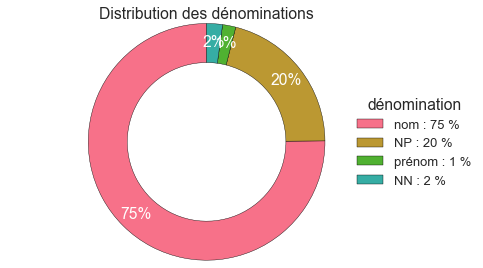

In [603]:
dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][[u"dénomination"]].apply(np.sum)
dfJoueurs=dfJoueurs.append(dfAX.T)
donut(dfAX,u"dénomination",None,u"nom NP prénom NN".split(" "),u"Distribution des dénominations")


# Dénominations par type de tour (PxP vs colour)
- à séparer par speaker dans un donut intérieur

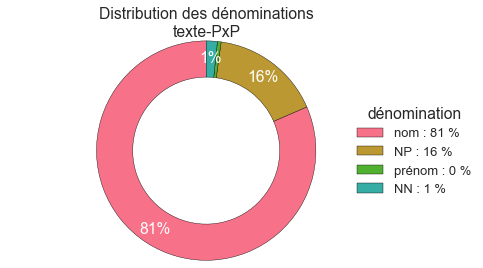

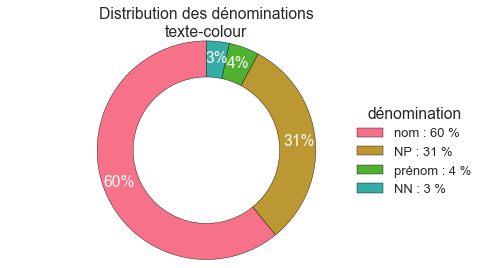

In [604]:
listeAX=[]
for tour in ["texte-PxP","texte-colour"]:
    dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch[tour].notnull())][[u"dénomination"]].apply(np.sum)
    listeAX.append(dfAX[u"dénomination"].tolist())
    donut(dfAX,u"dénomination",None,u"nom NP prénom NN".split(" "),u"Distribution des dénominations\n"+tour,pctMin=1)

# Donuts enchassés

In [639]:
def preparerSubWedges(listeAX):
    if isinstance(listeAX,pd.DataFrame):
        print listeAX
    else:
        lSubWedge=len(listeAX[0])
        lListeAX=len(listeAX)
        subWedges=[]
        for i in range(lSubWedge):
            for j in range(lListeAX):
                subWedges.append(listeAX[j][i])   
        return pd.Series(subWedges)
    
def donuts(dfAX,y,extLabels,intLabels,
           listeSubs,titre,
           prepSub=0,
           extPalette="husl",intPalette="Blues",
           figsize=(4,4),pctMin=0,
           titreIntLegend=None,
           titreExtLegend=None,
          ):
    
    extWedges = dfAX[y]
    if prepSub==0:
        intWedges = preparerSubWedges(listeSubs)
    elif prepSub==1:
        intWedges=sum(listeSubs,[])
#     elif prepSub==2:
#         intWedges=listeSubs
    legendLabels = ["%s %s"%(extL,intL) for extL in extLabels for intL in intLabels ]
    intWedges.columns=legendLabels
    pieSum=extWedges.sum()
    legendValues=(extWedges/pieSum*100)
    
    # Plot
    
    extAX=extWedges.plot(kind="pie", 
                         labels=None,#extLabels, 
                         startangle=90,
#                         frame=True,
                         colors=sns.color_palette(extPalette, len(extLabels)),
                         autopct=lambda p: '%1d%%'%p if round(p) > pctMin else '',
                         pctdistance = 0.86,
                         figsize=figsize,
                         textprops=dict(color="w")
                        )
    extAX.set(ylabel="")
    intAX=intWedges.plot(kind="pie",
                         labels=None,#legendLabels,
                         radius=0.75,
                         startangle=90,
                         colors=sns.color_palette(intPalette, len(intLabels)),
                        )
    intAX.set(ylabel="")

    if legendLabels: 
        legendLabels=['%s : %1d %%' % (l, s) for l, s in zip(extLabels, legendValues)]
    extLegend=extAX.legend(labels=legendLabels,
                           title=titreExtLegend,
                           loc="center right",
                          bbox_to_anchor=(0.99, 0.75)
                          )
#     first_legend = extAX.legend(range(4), loc = 1)
#     second_legend = intAX.legend("AB", loc = 2)

    legendLines=[]
    for numCol,col in enumerate(sns.color_palette(intPalette, len(intLabels))):
        legendLines.append(mpatches.Patch(color=col,label=intLabels[numCol]))
    intAX.legend(handles=legendLines,
                 loc="center right",
                 title=titreIntLegend,
                 bbox_to_anchor=(0.99, 0.25),
                )
    

   

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.gca().add_artist(extLegend)
    
    plt.title(titre,y=1.08)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig('PC-%s.png'%(formatNomFichier(titre)), dpi=150, bbox_inches="tight")
    plt.show()

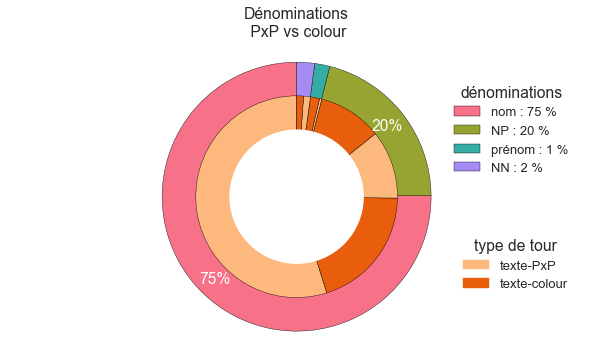

In [642]:
dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][[u"dénomination"]].apply(np.sum)
listeAX=[]
for tour in ["texte-PxP","texte-colour"]:
    dfTour=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch[tour].notnull())][[u"dénomination"]].apply(np.sum)
    listeAX.append(dfTour[u"dénomination"].tolist())
donuts(dfAX,u"dénomination",u"nom NP prénom NN".split(" "),["texte-PxP","texte-colour"],
       listeAX,u"Dénominations\n PxP vs colour",
       intPalette="Oranges",
       pctMin=2,
       figsize=(8.5,5),
       titreExtLegend=u"dénominations",
       titreIntLegend="type de tour",
      )

# Donut des dénominations par joueur
En même temps qu'on dessine les donuts, on alimente un tableau général pour les dénominations des joueurs *dfJoueurs*

In [607]:
#dfJoueurs=pd.DataFrame(columns="prénom nom PN NN".split(" "))
dfJoueurs=pd.DataFrame(columns=range(4))

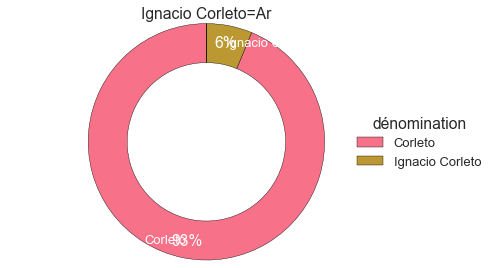

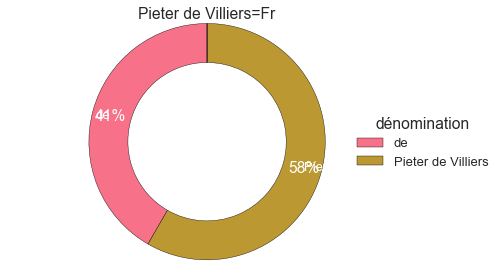

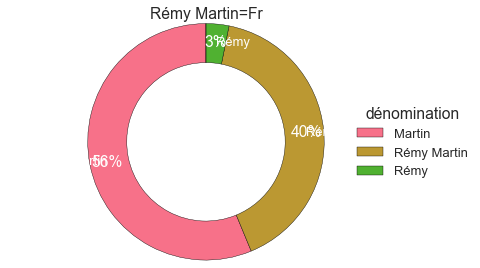

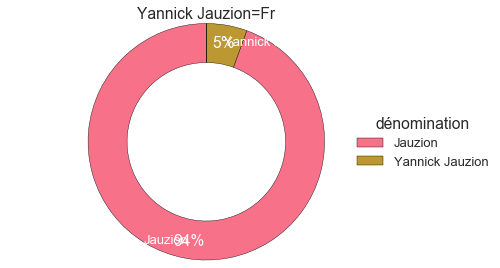

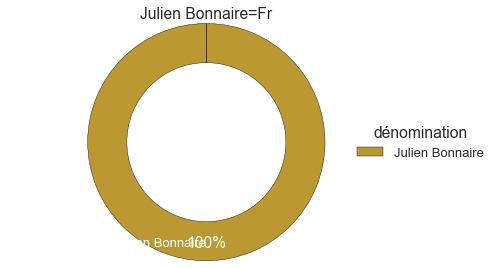

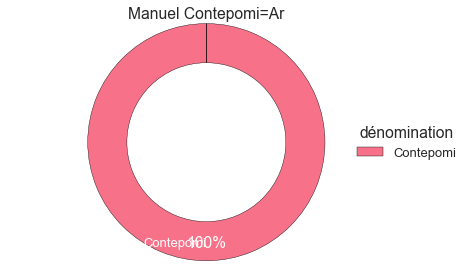

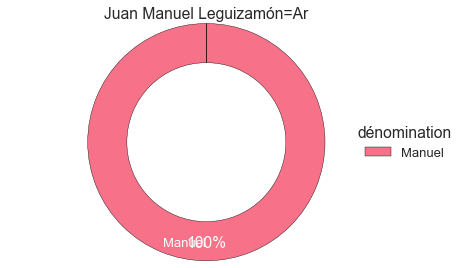

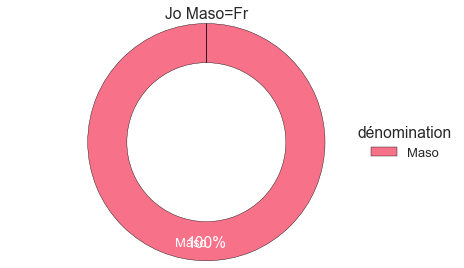

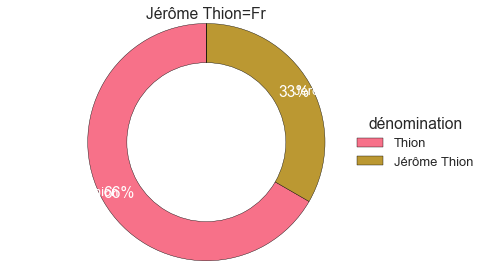

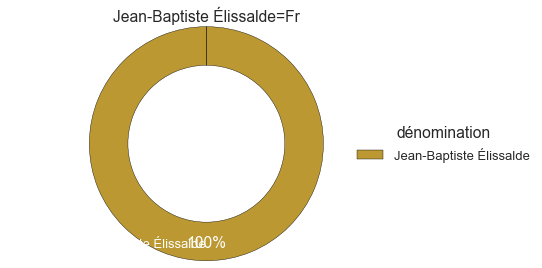

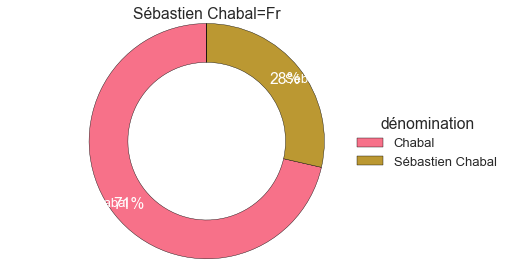

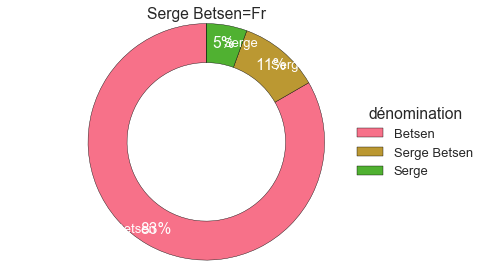

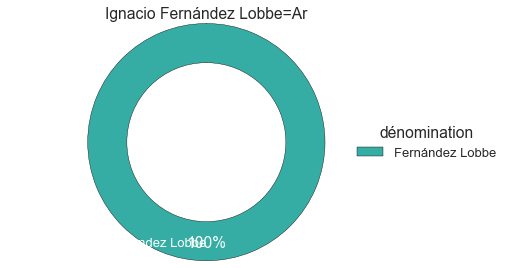

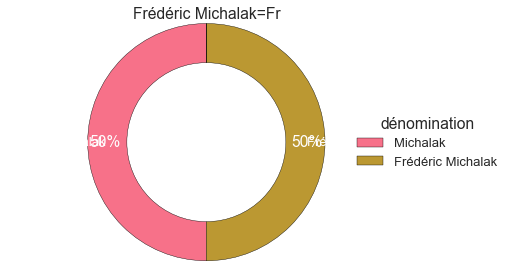

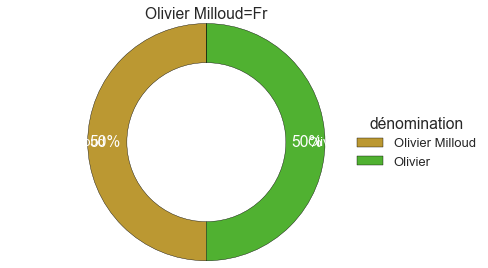

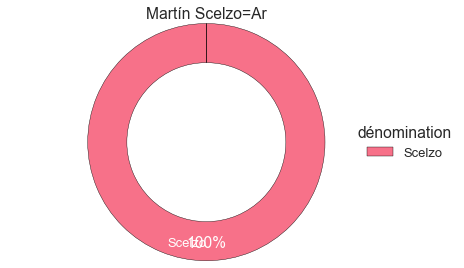

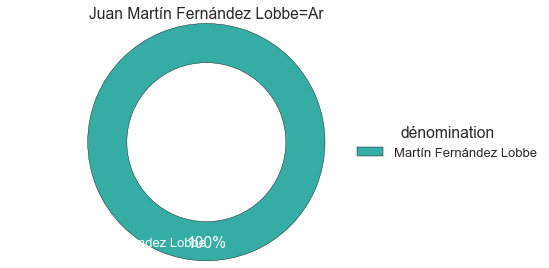

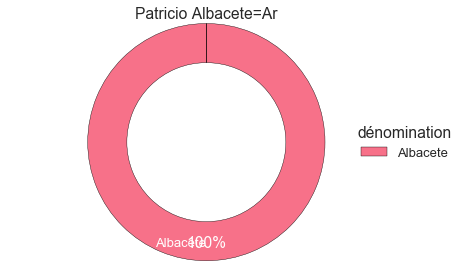

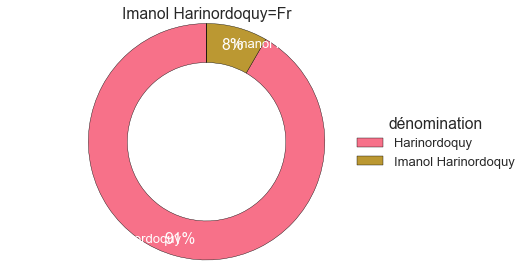

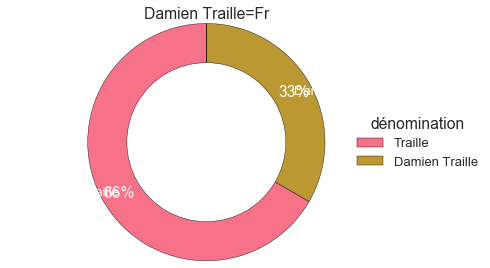

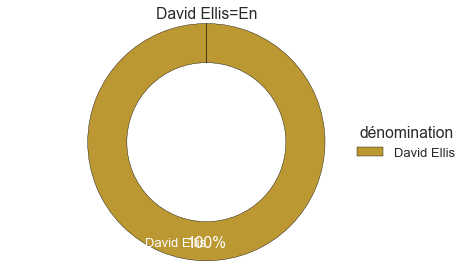

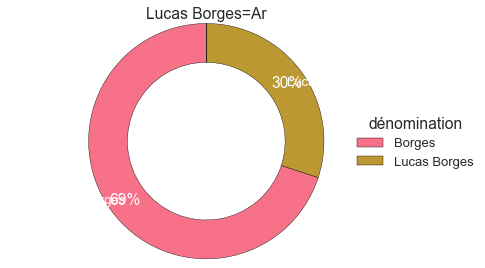

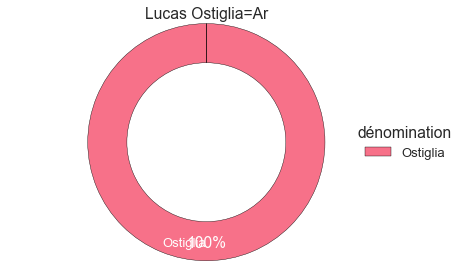

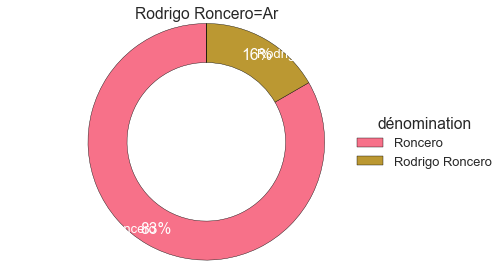

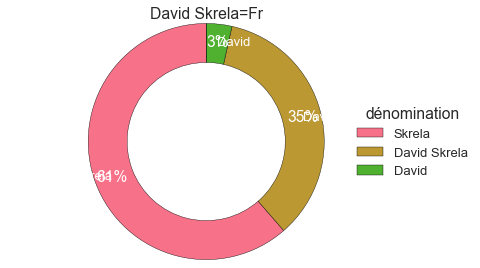

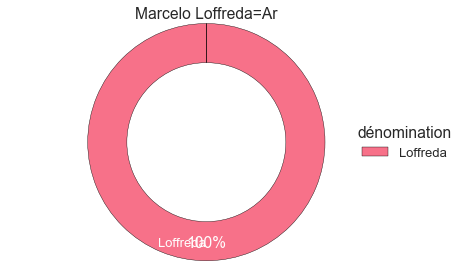

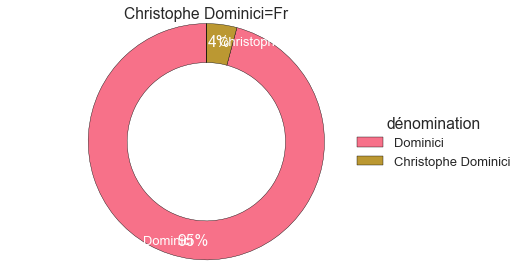

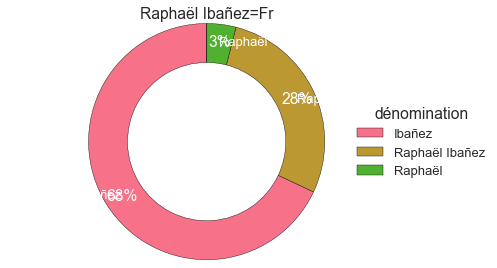

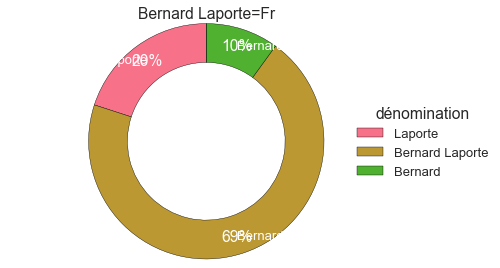

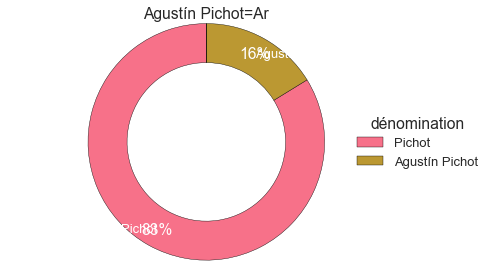

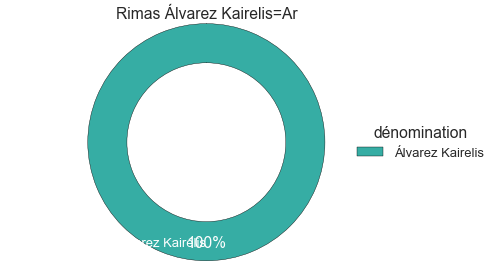

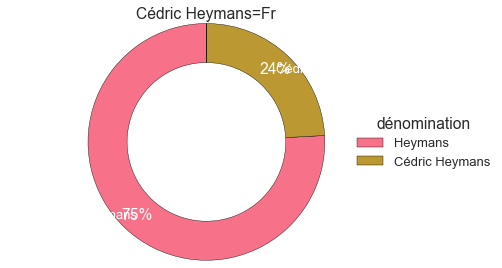

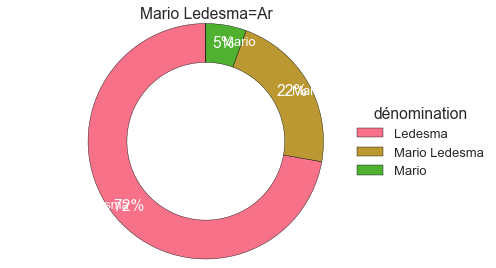

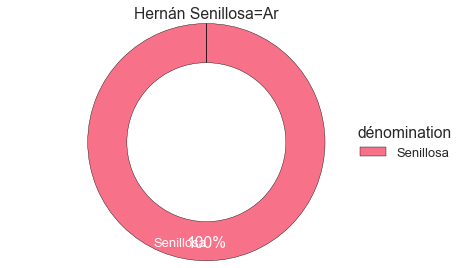

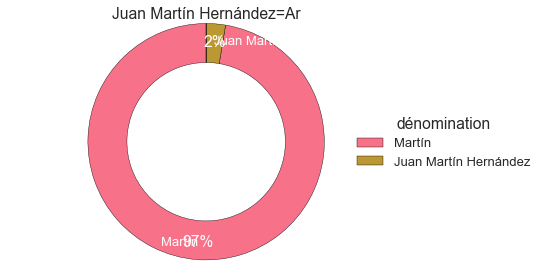

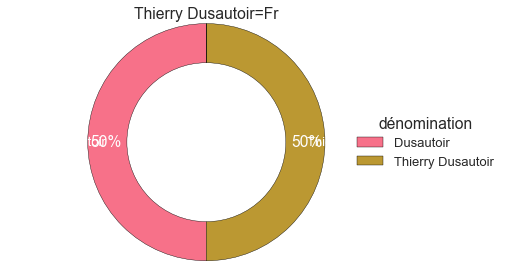

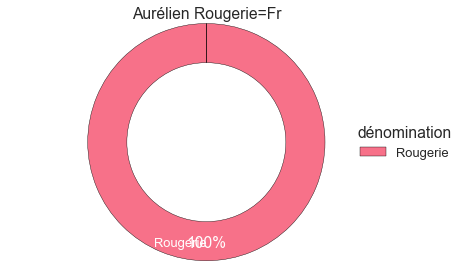

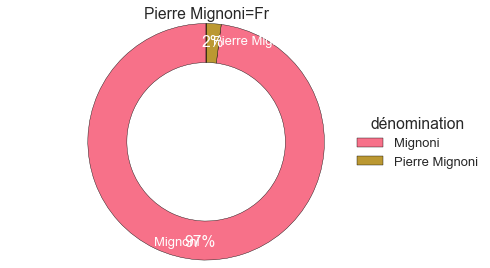

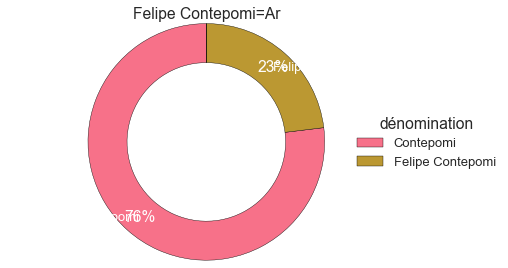

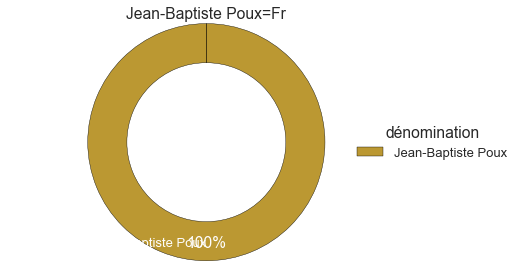

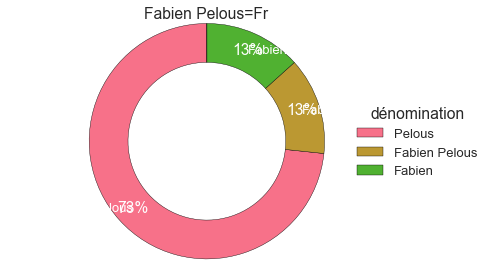

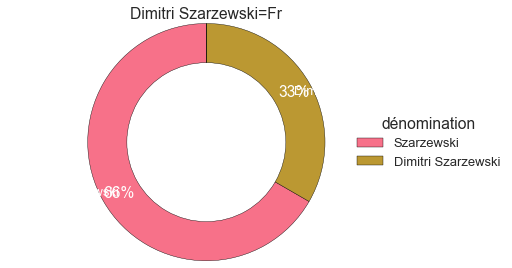

In [608]:
for joueur in joueurDenominations:
    dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][[joueur]].apply(np.sum)
    dfJoueurs=dfJoueurs.append(dfAX.T)
    donut(dfAX,joueur,joueurDenominationsAcc[joueur],None,joueur)


## Ajout d'une colonne total dans dfJoueurs

In [609]:
dfJoueurs["total"]=dfJoueurs[0]+dfJoueurs[1]+dfJoueurs[2]+dfJoueurs[3]
dfJoueurs

0   1  2  3 total
Ignacio Corleto=Ar              15   1  0  0    16
Pieter de Villiers=Fr            5   7  0  0    12
Rémy Martin=Fr                  18  13  1  0    32
Yannick Jauzion=Fr              17   1  0  0    18
Julien Bonnaire=Fr               0   1  0  0     1
Manuel Contepomi=Ar              2   0  0  0     2
Juan Manuel Leguizamón=Ar        4   0  0  0     4
Jo Maso=Fr                       1   0  0  0     1
Jérôme Thion=Fr                  4   2  0  0     6
Jean-Baptiste Élissalde=Fr       0   1  0  0     1
Sébastien Chabal=Fr             10   4  0  0    14
Serge Betsen=Fr                 15   2  1  0    18
Ignacio Fernández Lobbe=Ar       0   0  0  1     1
Frédéric Michalak=Fr             2   2  0  0     4
Olivier Milloud=Fr               0   1  1  0     2
Martín Scelzo=Ar                 2   0  0  0     2
Juan Martín Fernández Lobbe=Ar   0   0  0  9     9
Patricio Albacete=Ar             1   0  0  0     1
Imanol Harinordoquy=Fr          11   1  0  0    12
Damien Traille=Fr               18   9  0  0    27
David Ellis=En                   0   1  0  0     1
Lucas Borges=Ar                  7   3  0  0    10
Lucas Ostiglia=Ar                3   0  0  0     3
Rodrigo Roncero=Ar               5   1  0  0     6
David Skrela=Fr                 35  20  2  0    57
Marcelo Loffreda=Ar              1   0  0  0     1
Christophe Dominici=Fr          23   1  0  0    24
Raphaël Ibañez=Fr               17   7  1  0    25
Bernard Laporte=Fr               2   7  1  0    10
Agustín Pichot=Ar               31   6  0  0    37
Rimas Álvarez Kairelis=Ar        0   0  0  2     2
Cédric Heymans=Fr               22   7  0  0    29
Mario Ledesma=Ar                13   4  1  0    18
Hernán Senillosa=Ar              3   0  0  0     3
Juan Martín Hernández=Ar        37   1  0  0    38
Thierry Dusautoir=Fr             1   1  0  0     2
Aurélien Rougerie=Fr             9   0  0  0     9
Pierre Mignoni=Fr               48   1  0  0    49
Felipe Contepomi=Ar             20   6  0  0    26
Jean-Baptiste Poux=Fr            0   1  0  0     1
Fabien Pelous=Fr                11   2  2  0    15
Dimitri Szarzewski=Fr            4   2  0  0     6

In [610]:
dfJoueurs.columns=u"nom PN prénom NN total".split(" ")
dfJoueurs

nom  PN prénom NN total
Ignacio Corleto=Ar              15   1      0  0    16
Pieter de Villiers=Fr            5   7      0  0    12
Rémy Martin=Fr                  18  13      1  0    32
Yannick Jauzion=Fr              17   1      0  0    18
Julien Bonnaire=Fr               0   1      0  0     1
Manuel Contepomi=Ar              2   0      0  0     2
Juan Manuel Leguizamón=Ar        4   0      0  0     4
Jo Maso=Fr                       1   0      0  0     1
Jérôme Thion=Fr                  4   2      0  0     6
Jean-Baptiste Élissalde=Fr       0   1      0  0     1
Sébastien Chabal=Fr             10   4      0  0    14
Serge Betsen=Fr                 15   2      1  0    18
Ignacio Fernández Lobbe=Ar       0   0      0  1     1
Frédéric Michalak=Fr             2   2      0  0     4
Olivier Milloud=Fr               0   1      1  0     2
Martín Scelzo=Ar                 2   0      0  0     2
Juan Martín Fernández Lobbe=Ar   0   0      0  9     9
Patricio Albacete=Ar             1   0      0  0     1
Imanol Harinordoquy=Fr          11   1      0  0    12
Damien Traille=Fr               18   9      0  0    27
David Ellis=En                   0   1      0  0     1
Lucas Borges=Ar                  7   3      0  0    10
Lucas Ostiglia=Ar                3   0      0  0     3
Rodrigo Roncero=Ar               5   1      0  0     6
David Skrela=Fr                 35  20      2  0    57
Marcelo Loffreda=Ar              1   0      0  0     1
Christophe Dominici=Fr          23   1      0  0    24
Raphaël Ibañez=Fr               17   7      1  0    25
Bernard Laporte=Fr               2   7      1  0    10
Agustín Pichot=Ar               31   6      0  0    37
Rimas Álvarez Kairelis=Ar        0   0      0  2     2
Cédric Heymans=Fr               22   7      0  0    29
Mario Ledesma=Ar                13   4      1  0    18
Hernán Senillosa=Ar              3   0      0  0     3
Juan Martín Hernández=Ar        37   1      0  0    38
Thierry Dusautoir=Fr             1   1      0  0     2
Aurélien Rougerie=Fr             9   0      0  0     9
Pierre Mignoni=Fr               48   1      0  0    49
Felipe Contepomi=Ar             20   6      0  0    26
Jean-Baptiste Poux=Fr            0   1      0  0     1
Fabien Pelous=Fr                11   2      2  0    15
Dimitri Szarzewski=Fr            4   2      0  0     6

## Ajout de colonnes pourcentages dans dfJoueurs

In [611]:
dfJoueurs[u"pPrénom"]=dfJoueurs[u"prénom"].astype(float)/dfJoueurs[u"total"]
dfJoueurs[u"pNom"]=dfJoueurs[u"nom"].astype(float)/dfJoueurs[u"total"]
dfJoueurs[u"pPN"]=dfJoueurs[u"PN"].astype(float)/dfJoueurs[u"total"]
dfJoueurs[u"pNN"]=dfJoueurs[u"NN"].astype(float)/dfJoueurs[u"total"]

# Donuts des dénominations général puis par speaker
Décliner les donuts par plage de RJ et par tour (PxP vs colour)

In [612]:
dfSpkJoueurs={}
for spk in spkNoms:
    print spk
    dfSpkJoueurs[spk]=pd.DataFrame(columns=range(4))
    for joueur in joueurDenominations:
        print joueur
        dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch["Spk"]==spk)][[joueur]].apply(np.sum)
        dfSpkJoueurs[spk]=dfSpkJoueurs[spk].append(dfAX.T)
    dfSpkJoueurs[spk]["total"]=dfSpkJoueurs[spk][0]+dfSpkJoueurs[spk][1]+dfSpkJoueurs[spk][2]+dfSpkJoueurs[spk][3]
    dfSpkJoueurs[spk].columns=u"nom PN prénom NN total".split(" ")

spk1
Ignacio Corleto=Ar
Pieter de Villiers=Fr
Rémy Martin=Fr
Yannick Jauzion=Fr
Julien Bonnaire=Fr
Manuel Contepomi=Ar
Juan Manuel Leguizamón=Ar
Jo Maso=Fr
Jérôme Thion=Fr
Jean-Baptiste Élissalde=Fr
Sébastien Chabal=Fr
Serge Betsen=Fr
Ignacio Fernández Lobbe=Ar
Frédéric Michalak=Fr
Olivier Milloud=Fr
Martín Scelzo=Ar
Juan Martín Fernández Lobbe=Ar
Patricio Albacete=Ar
Imanol Harinordoquy=Fr
Damien Traille=Fr
David Ellis=En
Lucas Borges=Ar
Lucas Ostiglia=Ar
Rodrigo Roncero=Ar
David Skrela=Fr
Marcelo Loffreda=Ar
Christophe Dominici=Fr
Raphaël Ibañez=Fr
Bernard Laporte=Fr
Agustín Pichot=Ar
Rimas Álvarez Kairelis=Ar
Cédric Heymans=Fr
Mario Ledesma=Ar
Hernán Senillosa=Ar
Juan Martín Hernández=Ar
Thierry Dusautoir=Fr
Aurélien Rougerie=Fr
Pierre Mignoni=Fr
Felipe Contepomi=Ar
Jean-Baptiste Poux=Fr
Fabien Pelous=Fr
Dimitri Szarzewski=Fr
spk2
Ignacio Corleto=Ar
Pieter de Villiers=Fr
Rémy Martin=Fr
Yannick Jauzion=Fr
Julien Bonnaire=Fr
Manuel Contepomi=Ar
Juan Manuel Leguizamón=Ar
Jo Maso=Fr
Jér

In [613]:
sum([[1,2,3],[1,2,3],[1,2,3]],[])

[1, 2, 3, 1, 2, 3, 1, 2, 3]

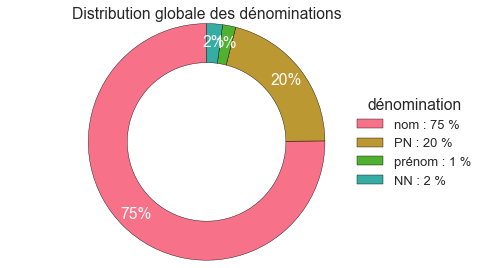

In [614]:
dfAX=dfJoueurs[u"nom PN prénom NN".split(" ")].sum()
donut(dfAX,None,None,u"nom PN prénom NN".split(" "),u"Distribution globale des dénominations")

In [615]:
dfSpkJoueurs

{'spk1':                                nom  PN prénom NN total
 Ignacio Corleto=Ar              12   1      0  0    13
 Pieter de Villiers=Fr            5   4      0  0     9
 Rémy Martin=Fr                  13   8      0  0    21
 Yannick Jauzion=Fr              14   1      0  0    15
 Julien Bonnaire=Fr               0   0      0  0     0
 Manuel Contepomi=Ar              2   0      0  0     2
 Juan Manuel Leguizamón=Ar        4   0      0  0     4
 Jo Maso=Fr                       1   0      0  0     1
 Jérôme Thion=Fr                  2   2      0  0     4
 Jean-Baptiste Élissalde=Fr       0   1      0  0     1
 Sébastien Chabal=Fr              7   1      0  0     8
 Serge Betsen=Fr                 10   1      1  0    12
 Ignacio Fernández Lobbe=Ar       0   0      0  1     1
 Frédéric Michalak=Fr             2   1      0  0     3
 Olivier Milloud=Fr               0   0      1  0     1
 Martín Scelzo=Ar                 1   0      0  0     1
 Juan Martín Fernández Lobbe=Ar   0   0 

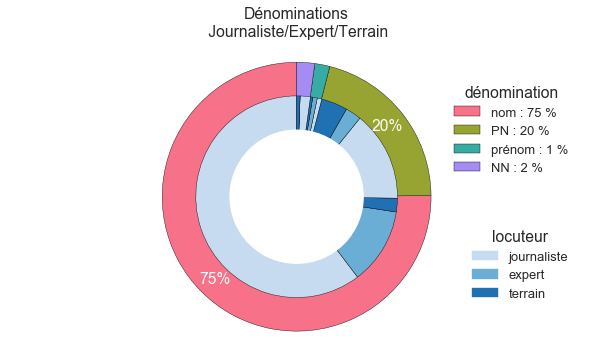

In [644]:
dfAX=pd.DataFrame(dfJoueurs[u"nom PN prénom NN".split(" ")].sum())
listeAX=[]
for spk in spkNoms:
    listeAX.append(dfSpkJoueurs[spk][u"nom PN prénom NN".split(" ")].sum().tolist())
donuts(dfAX,0,u"nom PN prénom NN".split(" "),spkNoms.values(),
       listeAX,u"Dénominations\n Journaliste/Expert/Terrain",
       figsize=(8.5,5),
       pctMin=2,
       titreExtLegend=u"dénomination",
       titreIntLegend="locuteur",
      )




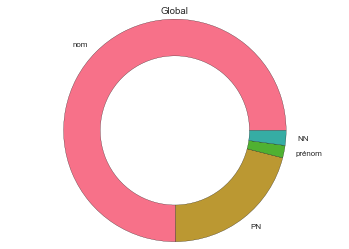

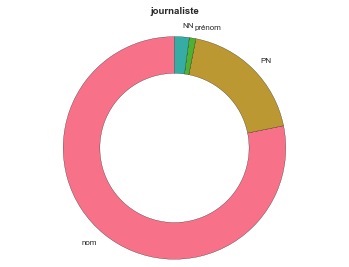

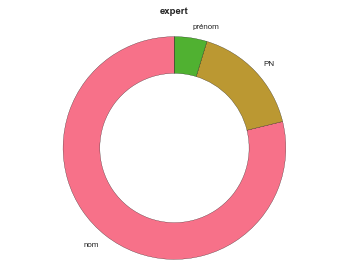

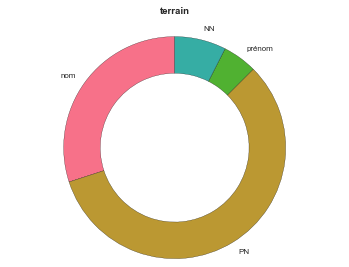

In [203]:
title=u"Dénominations-Global"
ax=dfJoueurs[u"nom PN prénom NN".split(" ")].sum().plot("pie",
                                                        wedgeprops=dict(width=0.33),
                                                        title="Global")
ax.axis('equal')
ax.set(ylabel="")
plt.savefig('PC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

for spk in spkNoms:
    ax=dfSpkJoueurs[spk][u"nom PN prénom NN".split(" ")].sum().plot("pie",
                                                                    wedgeprops=dict(width=0.33),
#                                                                    autopct=lambda p: '%1d%%'%round(p) if round(p) > 0 else '',
#                                                                    pctdistance = 0.85,
                                                                    startangle=90,
                                                                    )
    ax.axis('equal')
    ax.set(ylabel="")
    plt.title(spkNoms[spk],y=1.08,fontweight="bold")
    title=u"Dénominations-%s"%spkNoms[spk]
    plt.savefig('PC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
    plt.show()

In [204]:
dfSpkJoueurs

{'spk1':                                prénom nom  PN NN total
 Ignacio Corleto=Ar                  0  12   1  0    13
 Pieter de Villiers=Fr               0   5   4  0     9
 Rémy Martin=Fr                      0  13   8  0    21
 Yannick Jauzion=Fr                  0  14   1  0    15
 Julien Bonnaire=Fr                  0   0   0  0     0
 Manuel Contepomi=Ar                 0   2   0  0     2
 Juan Manuel Leguizamón=Ar           0   4   0  0     4
 Jérôme Thion=Fr                     0   2   2  0     4
 Jean-Baptiste Élissalde=Fr          0   0   1  0     1
 Sébastien Chabal=Fr                 0   7   1  0     8
 David Ellis=En                      0   0   1  0     1
 Felipe Contepomi=Ar                 0  17   6  0    23
 Ignacio Fernández Lobbe=Ar          0   0   0  1     1
 Frédéric Michalak=Fr                0   2   1  0     3
 Olivier Milloud=Fr                  1   0   0  0     1
 Martín Scelzo=Ar                    0   1   0  0     1
 Juan Martín Fernández Lobbe=Ar      0  

# Distribution des dénominations par joueurs (stacked bars)

## global trié par nombre de dénominations

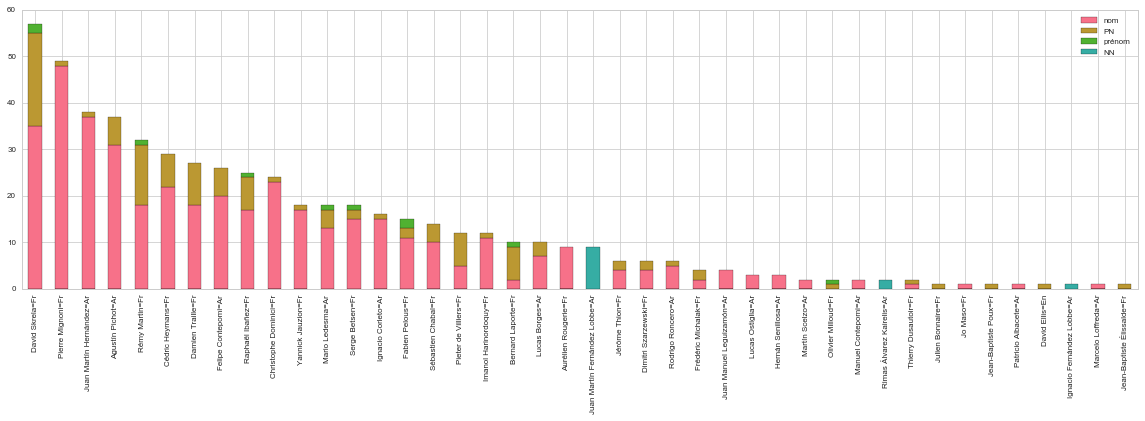

In [205]:
title=u"DistributionDénominationsJoueurs"
ax=dfJoueurs.sort_values("total",ascending=False).iloc[:][["nom","PN",u"prénom","NN"]].plot(kind="bar",stacked=True, figsize=(20,5))
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

## 20 plus fréquents

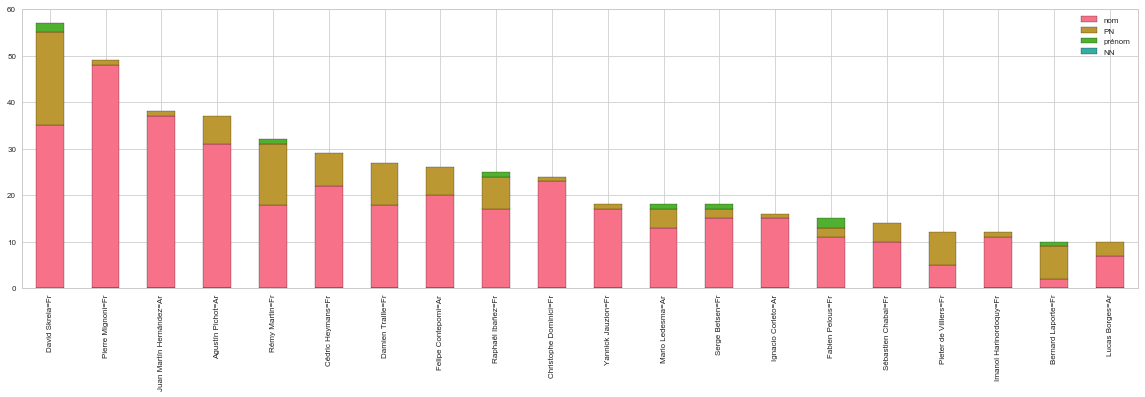

In [227]:
title=u"DistributionDénominationsJoueurs-20Premiers"
dfJoueurs.sort_values("total",ascending=False).iloc[:20][["nom","PN",u"prénom","NN"]].plot(kind="bar",stacked=True, figsize=(20,5))
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

## queue de la distribution

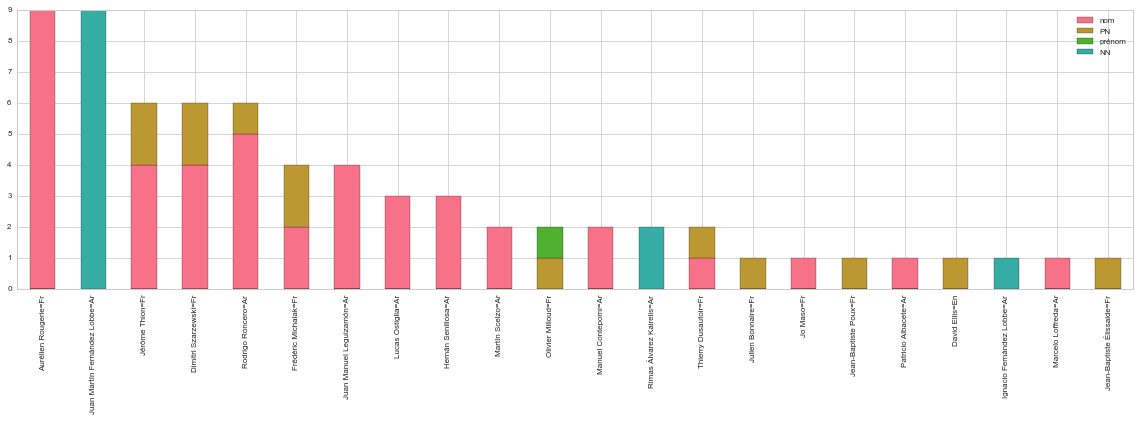

In [226]:
title=u"DistributionDénominationsJoueurs-Derniers"
dfJoueurs.sort_values("total",ascending=False).iloc[20:][["nom","PN",u"prénom","NN"]].plot(kind="bar",stacked=True, figsize=(20,5))
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

## Pourcentages des dénominations par joueurs

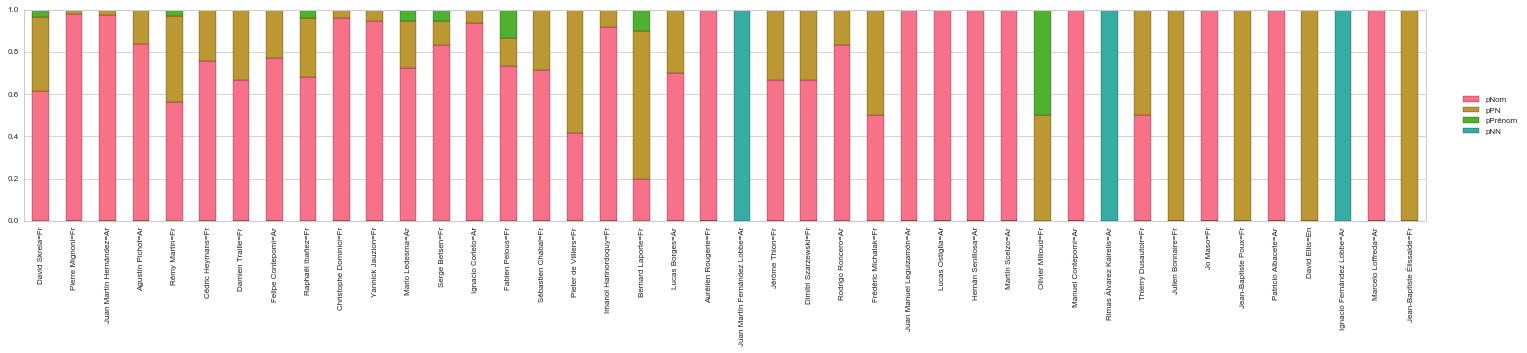

In [208]:
title=u"DistributionDénominationsJoueurs-Pourcentages"
dfAX=dfJoueurs.sort_values("total",ascending=False).iloc[:][["pNom","pPN",u"pPrénom","pNN"]]
ax=dfAX.plot(kind="bar",stacked=True, figsize=(20,5))
ax.legend(loc="right",bbox_to_anchor=(1.07, 0.5))
plt.tight_layout()
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

## Dénominations des joueurs par speaker

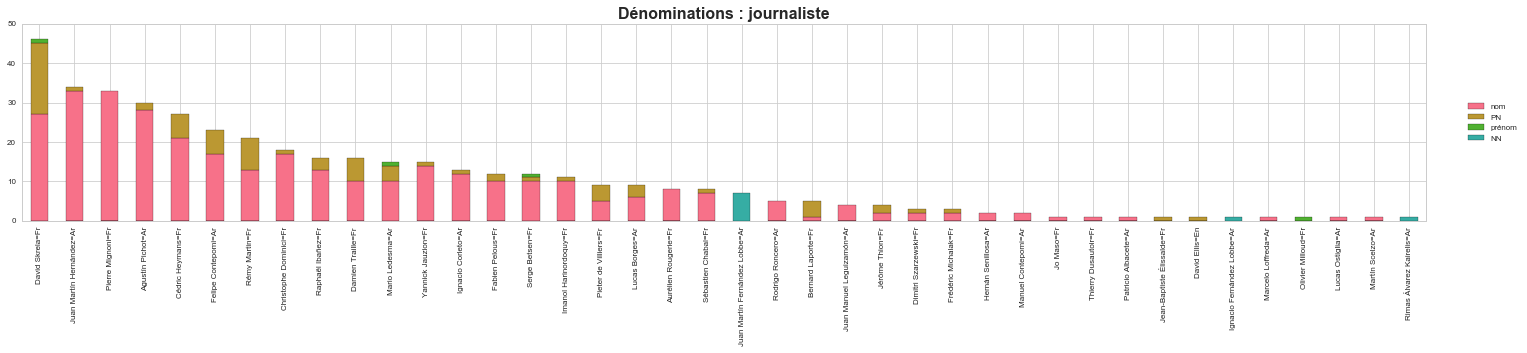

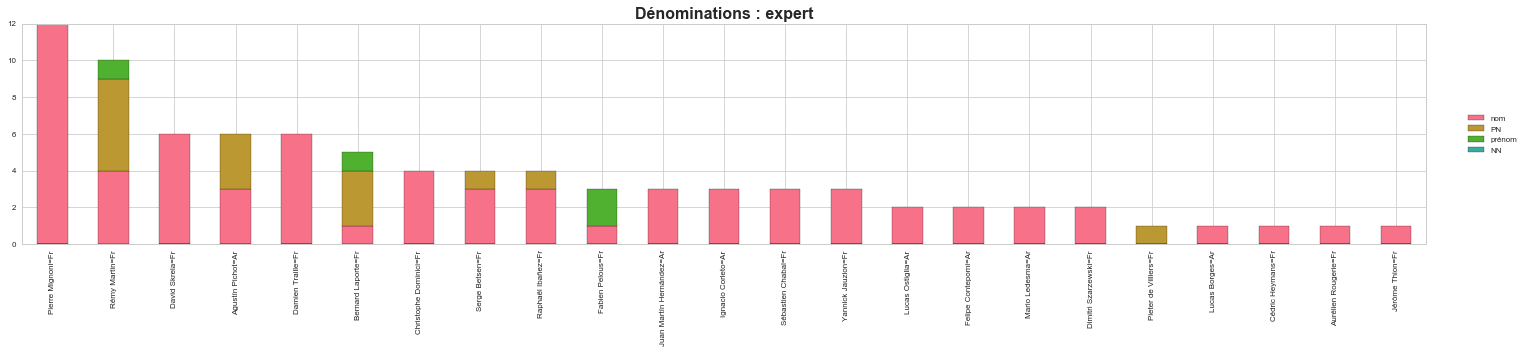

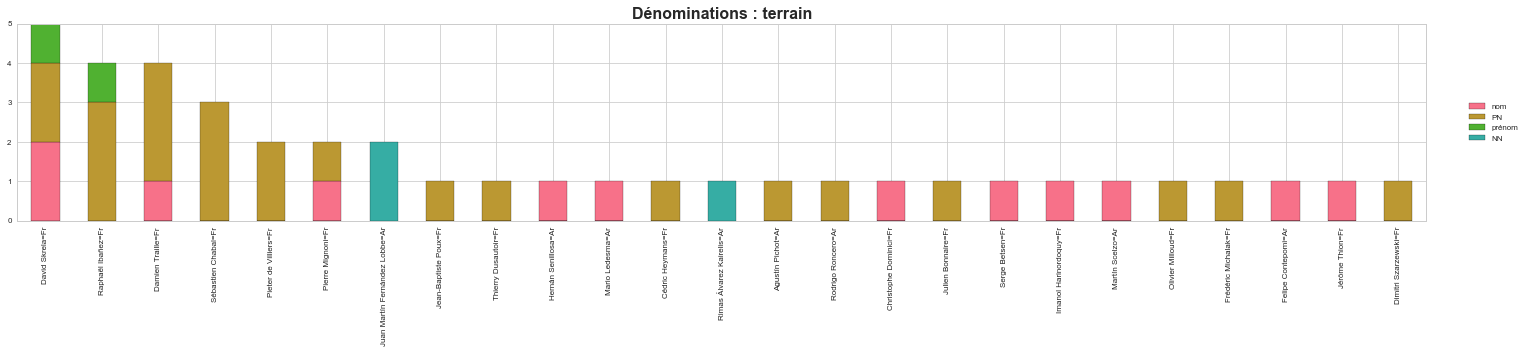

In [209]:
for spk in spkNoms:
    dfAX=dfSpkJoueurs[spk][dfSpkJoueurs[spk]["total"]>0].sort_values("total",ascending=False).iloc[:][["nom","PN",u"prénom","NN"]]
    ax=dfAX.plot(kind="bar",
                 stacked=True, 
                 figsize=(20,5),
                 )
    ax.legend(loc="right",bbox_to_anchor=(1.07, 0.5))
    plt.title(u"Dénominations : %s"%spkNoms[spk],
              fontweight="bold",
              fontsize=16,
             )
    plt.tight_layout()
    plt.show()
    

# Faire des donuts pour les dénominations
- distribution des dénominations par type de tour
- distribution des dénominations par plage de RJ5.00

# Faire des stacked bars
- distribution des dénominations en séparant les types de tours

# Distribution des dénominations par RJ

In [212]:
listeAX=[]
for denom in u"nom PN prénom NN".split(" "):
    dictAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch[denom]!=0)][["RJ5",denom]].groupby("RJ5").count()[denom].to_dict()
    seriesAX=[]
    for i in range(len(rythmeCuts)):
        if i in dictAX:
            seriesAX.append(dictAX[i])
        else:
            seriesAX.append(0)
    listeAX.append(seriesAX)
listeAX
subAX=pd.DataFrame(listeAX)
subAX.index=u"nom PN prénom NN".split(" ")
subAX.columns=["%d"%r for r in rythmeCuts]
subAX

0   1   2   3   4   5  6  7  8
nom     148  44  54  52  43  34  6  2  0
PN       55  15  15  10   6   5  0  1  0
prénom    6   0   0   0   2   2  0  0  0
NN        6   0   2   0   3   0  0  0  0

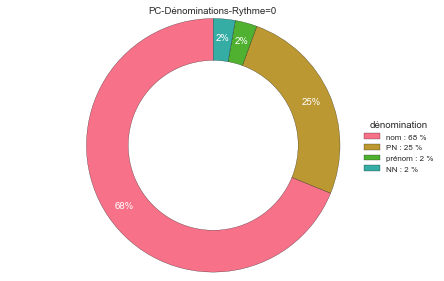

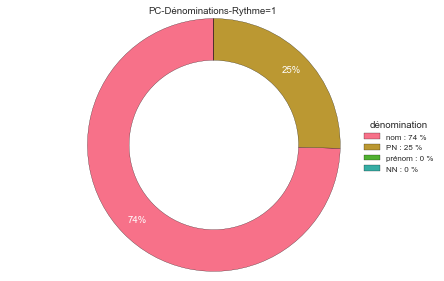

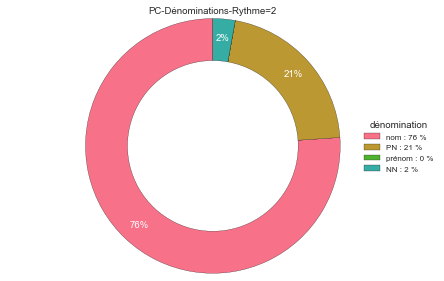

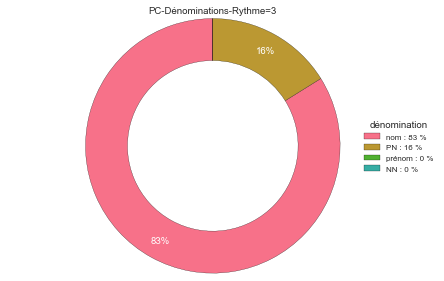

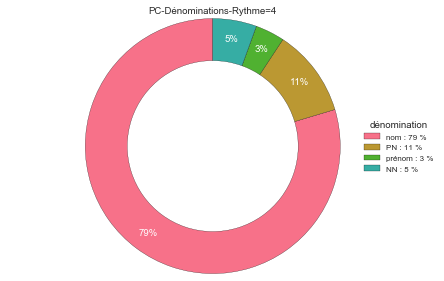

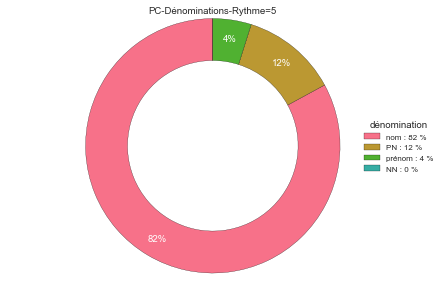

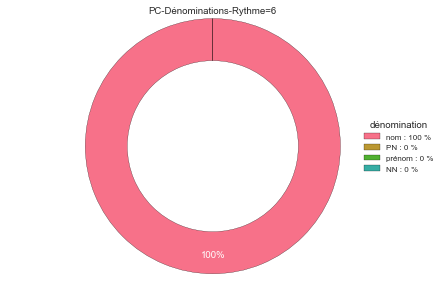

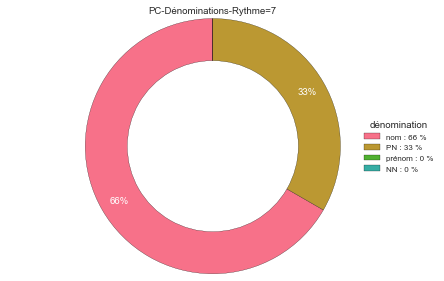

In [213]:
for rythme in subAX.columns:
    if subAX[rythme].sum()>0:
        donut(subAX,rythme,None,u"nom PN prénom NN".split(" "),u"PC-Dénominations-Rythme="+rythme)

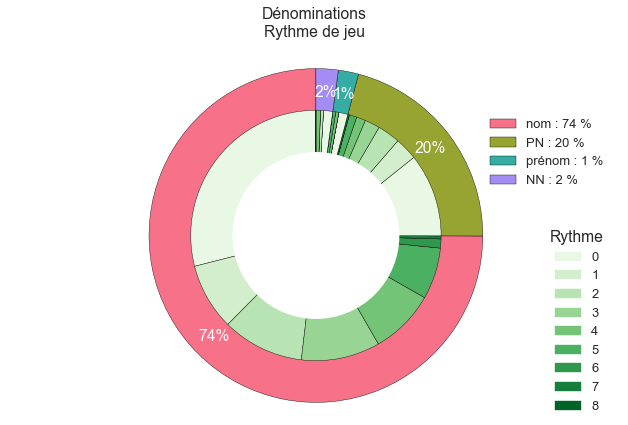

In [646]:
subWedges=[r.tolist() for ix,r in subAX.T.iterrows()]
dfAX=pd.DataFrame(subAX.T[u"nom PN prénom NN".split(" ")].sum())
donuts(dfAX,0,u"nom PN prénom NN".split(" "),
       rythmeCuts,subWedges,
       u"Dénominations\nRythme de jeu",prepSub=0,
       intPalette="Greens",
       figsize=(9,6),
       titreIntLegend="Rythme",
      )

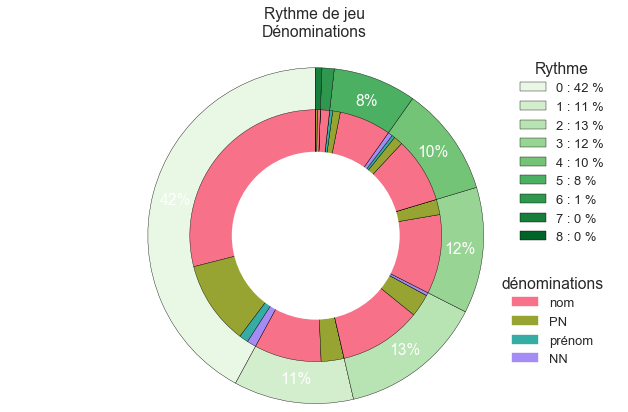

In [649]:
dfAX=pd.DataFrame(subAX.sum())
subWedges=[r.tolist() for ix,r in subAX.iterrows()]
donuts(dfAX,0,rythmeCuts,u"nom PN prénom NN".split(" "),
       subWedges,u"Rythme de jeu\nDénominations",prepSub=0,
       intPalette="husl",
       extPalette="Greens",
       titreIntLegend=u"dénominations",
       figsize=(9,6),
       titreExtLegend=u"Rythme",
       pctMin=1,
      )

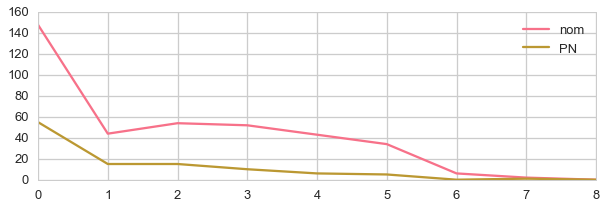

In [650]:
subAX.T[["nom","PN"]].plot(figsize=(10,3))
plt.savefig(u"LC-Dénominations-RythmeJeu", dpi=150, bbox_inches="tight")

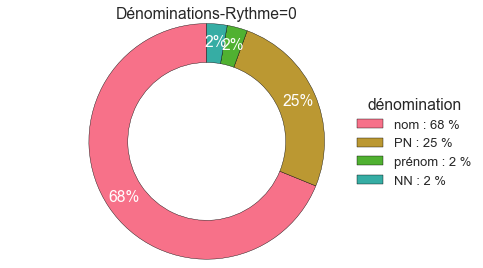

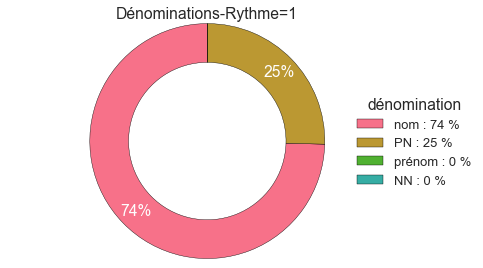

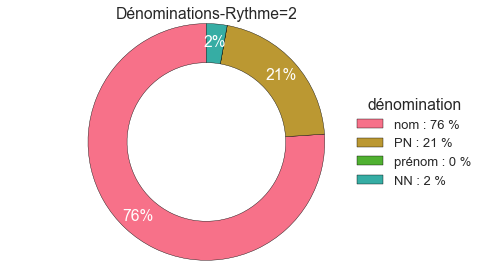

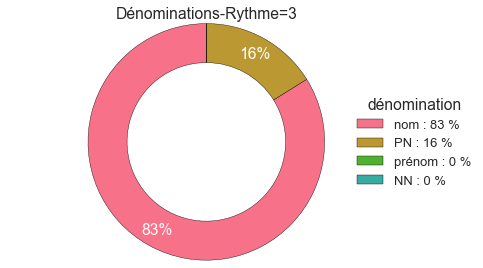

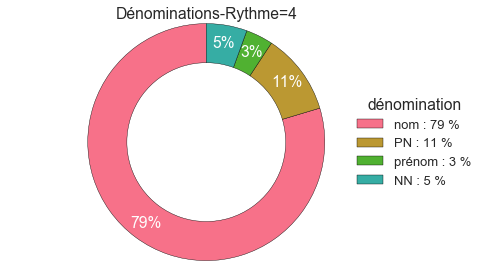

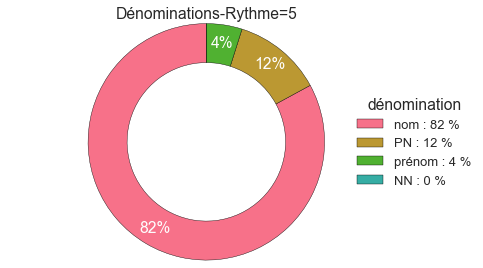

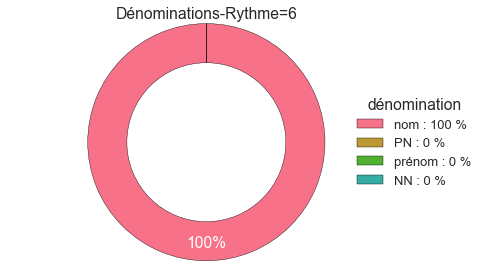

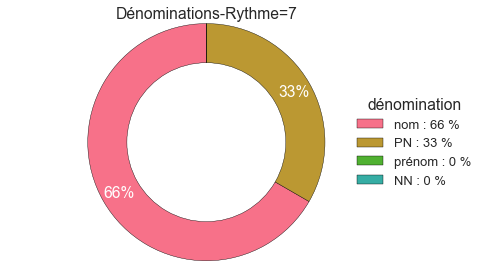

In [651]:
for rythme in ["%d"%i for i in range(9)]:
    if subAX[rythme].sum()>0:
        donut(subAX,rythme,None,u"nom PN prénom NN".split(" "),u"Dénominations-Rythme="+rythme)


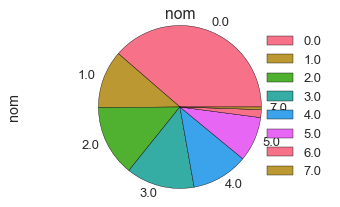

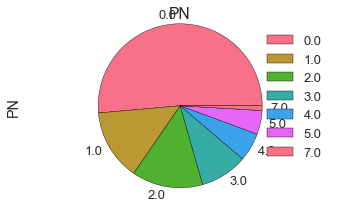

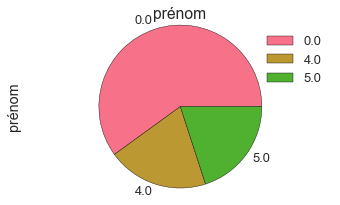

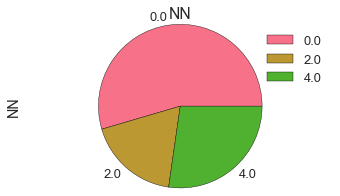

In [654]:
for denom in u"nom PN prénom NN".split(" "):
    dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch[denom]!=0)][["RJ5",denom]].groupby("RJ5").count()
    dfAX
    ax=dfAX.plot(kind="pie",
                 y=denom,
                 figsize=(5,3),
                )
    ax.axis("equal")
    plt.title(denom)
    plt.tight_layout()
    plt.show()

In [219]:
joueur="David Skrela=Fr"
dfNomsMatch[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch[joueur]!="0,0,0,0")][["noms",joueur,"début","fin"]]

noms David Skrela=Fr    début      fin
timeline                                                         
3616.0             David Skrela    [0, 0, 1, 0]    36.16    38.52
4232.0                  Roncero    [0, 0, 0, 0]    42.32    43.84
4456.0                   Pichot    [0, 0, 0, 0]    44.56    45.76
4656.0                Hernandez    [0, 0, 0, 0]    46.56    47.80
7144.0           Raphaël Ibañez    [0, 0, 0, 0]    71.44    73.84
8120.0                   Pichot    [0, 0, 0, 0]    81.20    82.40
8472.0           Cédric Heymans    [0, 0, 0, 0]    84.72    88.12
8844.0                   Pichot    [0, 0, 0, 0]    88.44    90.44
9092.0                  Heymans    [0, 0, 0, 0]    90.92    91.88
9596.0             David Skrela    [0, 0, 1, 0]    95.96    96.96
9920.0                  Thierry    [0, 0, 0, 0]    99.20    99.64
10000.0          Agustin Pichot    [0, 0, 0, 0]   100.00   102.36
11104.0                 Heymans    [0, 0, 0, 0]   111.04   112.40
11740.0                 Ledesma    [0, 0, 0, 0]   117.40   118.44
11872.0     Mario Ledesma,Mario    [0, 0, 0, 0]   118.72   121.64
13568.0                 Ledesma    [0, 0, 0, 0]   135.68   136.80
14360.0               Hernandez    [0, 0, 0, 0]   143.60   146.12
14744.0          Cédric Heymans    [0, 0, 0, 0]   147.44   150.64
16056.0   Juan Martin Hernandez    [0, 0, 0, 0]   160.56   163.80
16480.0          Cédric Heymans    [0, 0, 0, 0]   164.80   166.64
18164.0               Hernandez    [0, 0, 0, 0]   181.64   182.48
19068.0           Mario Ledesma    [0, 0, 0, 0]   190.68   194.04
19872.0             Rémy Martin    [0, 0, 0, 0]   198.72   201.92
20468.0                Albacete    [0, 0, 0, 0]   204.68   205.80
20716.0         Fernandez Lobbe    [0, 0, 0, 0]   207.16   208.76
21956.0               Hernandez    [0, 0, 0, 0]   219.56   220.72
22336.0      Hernandez,Dominici    [0, 0, 0, 0]   223.36   225.36
23160.0                 Mignoni    [0, 0, 0, 0]   231.60   234.32
23464.0             de Villiers    [0, 0, 0, 0]   234.64   235.76
23808.0      Pieter de Villiers    [0, 0, 0, 0]   238.08   241.44
...                         ...             ...      ...      ...
577614.0     Dimitri Szarzewski    [0, 0, 0, 0]  5776.14  5778.86
580710.0                 Pelous    [0, 0, 0, 0]  5807.10  5808.02
580858.0          Pelous,Ibañez    [0, 0, 0, 0]  5808.58  5810.41
582162.0                 Chabal    [0, 0, 0, 0]  5821.62  5822.22
583170.0                 Pichot    [0, 0, 0, 0]  5831.70  5832.37
583262.0              Hernandez    [0, 0, 0, 0]  5832.62  5833.45
583430.0             Szarzewski    [0, 0, 0, 0]  5834.30  5836.02
583722.0                 Chabal    [0, 0, 0, 0]  5837.22  5837.78
583778.0                 Chabal    [0, 0, 0, 0]  5837.78  5838.74
584082.0                 Betsen    [0, 0, 0, 0]  5840.82  5842.90
584586.0                  Serge    [0, 0, 0, 0]  5845.86  5846.58
584658.0                 Betsen    [0, 0, 0, 0]  5846.58  5847.06
584849.0                 Chabal    [0, 0, 0, 0]  5848.49  5850.06
585766.0    Betsen,Serge Betsen    [0, 0, 0, 0]  5857.66  5862.78
586310.0                 Chabal    [0, 0, 0, 0]  5863.10  5864.41
586745.0  Betsen,Raphaël Ibañez    [0, 0, 0, 0]  5867.45  5871.02
587162.0           David Skrela    [0, 0, 1, 0]  5871.62  5874.10
587478.0                Fabrice    [0, 0, 0, 0]  5874.78  5878.54
588014.0           David Skrela    [0, 0, 1, 0]  5880.14  5880.98
588470.0          Ibañez,Pelous    [0, 0, 0, 0]  5884.70  5886.18
588658.0                 Betsen    [0, 0, 0, 0]  5886.58  5889.18
590018.0  Szarzewski,Szarzewski    [0, 0, 0, 0]  5900.18  5902.70
590926.0                 Betsen    [0, 0, 0, 0]  5909.26  5910.86
591322.0                 Chabal    [0, 0, 0, 0]  5913.22  5915.10
591686.0              Contepomi    [0, 0, 0, 0]  5916.86  5918.45
593066.0          Fred Michalak    [0, 0, 0, 0]  5930.66  5932.45
593562.0                  David    [1, 0, 0, 0]  5935.62  5936.58
593658.0                 Skrela    [0, 1, 0, 0]  5936.58  5936.94
5

# Dénominations Fixes
- 15 personnes ont une dénomination fixe
 - la plupart ne sont mentionnés qu'une fois Bonnaire, Elissalde, Ellis, Fernandez Lobbe, Albacete, Loffreda, Maso, Poux
 - les autres ne sont mentionnés que par leurs noms :
   - nom : Contepomi, Leguizamon, Scelzo, Ostiglia, Senillosa, Rougerie
   - NN : Alvarez Kairelis

In [655]:
dfJoueurs[dfJoueurs[u"nom PN prénom NN".split(" ")].max(axis=1)==dfJoueurs["total"]]

nom PN prénom NN total pPrénom pNom pPN pNN
Julien Bonnaire=Fr               0  1      0  0     1       0    0   1   0
Manuel Contepomi=Ar              2  0      0  0     2       0    1   0   0
Juan Manuel Leguizamón=Ar        4  0      0  0     4       0    1   0   0
Jo Maso=Fr                       1  0      0  0     1       0    1   0   0
Jean-Baptiste Élissalde=Fr       0  1      0  0     1       0    0   1   0
Ignacio Fernández Lobbe=Ar       0  0      0  1     1       0    0   0   1
Martín Scelzo=Ar                 2  0      0  0     2       0    1   0   0
Juan Martín Fernández Lobbe=Ar   0  0      0  9     9       0    0   0   1
Patricio Albacete=Ar             1  0      0  0     1       0    1   0   0
David Ellis=En                   0  1      0  0     1       0    0   1   0
Lucas Ostiglia=Ar                3  0      0  0     3       0    1   0   0
Marcelo Loffreda=Ar              1  0      0  0     1       0    1   0   0
Rimas Álvarez Kairelis=Ar        0  0      0  2     2       0    0   0   1
Hernán Senillosa=Ar              3  0      0  0     3       0    1   0   0
Aurélien Rougerie=Fr             9  0      0  0     9       0    1   0   0
Jean-Baptiste Poux=Fr            0  1      0  0     1       0    0   1   0

# Dénominations variables
- 27 personnes sont nommées de façon différente suivant les occurrences 
 - parmi celles-ci, 12 sont nommées au moins 10 fois avec au moins 10% de PN (prénom nom)

In [656]:
dfJoueurs[dfJoueurs[u"nom PN prénom NN".split(" ")].max(axis=1)!=dfJoueurs["total"]]

nom  PN prénom NN total    pPrénom      pNom  \
Ignacio Corleto=Ar        15   1      0  0    16          0    0.9375   
Pieter de Villiers=Fr      5   7      0  0    12          0  0.416667   
Rémy Martin=Fr            18  13      1  0    32    0.03125    0.5625   
Yannick Jauzion=Fr        17   1      0  0    18          0  0.944444   
Jérôme Thion=Fr            4   2      0  0     6          0  0.666667   
Sébastien Chabal=Fr       10   4      0  0    14          0  0.714286   
Serge Betsen=Fr           15   2      1  0    18  0.0555556  0.833333   
Frédéric Michalak=Fr       2   2      0  0     4          0       0.5   
Olivier Milloud=Fr         0   1      1  0     2        0.5         0   
Imanol Harinordoquy=Fr    11   1      0  0    12          0  0.916667   
Damien Traille=Fr         18   9      0  0    27          0  0.666667   
Lucas Borges=Ar            7   3      0  0    10          0       0.7   
Rodrigo Roncero=Ar         5   1      0  0     6          0  0.833333   
David Skrela=Fr           35  20      2  0    57  0.0350877  0.614035   
Christophe Dominici=Fr    23   1      0  0    24          0  0.958333   
Raphaël Ibañez=Fr         17   7      1  0    25       0.04      0.68   
Bernard Laporte=Fr         2   7      1  0    10        0.1       0.2   
Agustín Pichot=Ar         31   6      0  0    37          0  0.837838   
Cédric Heymans=Fr         22   7      0  0    29          0  0.758621   
Mario Ledesma=Ar          13   4      1  0    18  0.0555556  0.722222   
Juan Martín Hernández=Ar  37   1      0  0    38          0  0.973684   
Thierry Dusautoir=Fr       1   1      0  0     2          0       0.5   
Pierre Mignoni=Fr         48   1      0  0    49          0  0.979592   
Felipe Contepomi=Ar       20   6      0  0    26          0  0.769231   
Fabien Pelous=Fr          11   2      2  0    15   0.133333  0.733333   
Dimitri Szarzewski=Fr      4   2      0  0     6          0  0.666667   

                                pPN pNN  
Ignacio Corleto=Ar           0.0625   0  
Pieter de Villiers=Fr      0.583333   0  
Rémy Martin=Fr              0.40625   0  
Yannick Jauzion=Fr        0.0555556   0  
Jérôme Thion=Fr            0.333333   0  
Sébastien Chabal=Fr        0.285714   0  
Serge Betsen=Fr            0.111111   0  
Frédéric Michalak=Fr            0.5   0  
Olivier Milloud=Fr              0.5   0  
Imanol Harinordoquy=Fr    0.0833333   0  
Damien Traille=Fr          0.333333   0  
Lucas Borges=Ar                 0.3   0  
Rodrigo Roncero=Ar         0.166667   0  
David Skrela=Fr            0.350877   0  
Christophe Dominici=Fr    0.0416667   0  
Raphaël Ibañez=Fr              0.28   0  
Bernard Laporte=Fr              0.7   0  
Agustín Pichot=Ar          0.162162   0  
Cédric Heymans=Fr          0.241379   0  
Mario Ledesma=Ar           0.222222   0  
Juan Martín Hernández=Ar  0.0263158   0  
Thierry Dusautoir=Fr            0.5   0  
Pierre Mignoni=Fr         0.0204082   0  
Felipe Contepomi=Ar        0.230769   0  
Fabien Pelous=Fr           0.133333   0  
Dimitri Szarzewski=Fr      0.333333   0

In [657]:
listeDistJoueursNoms=dfJoueurs[(dfJoueurs[u"pPN"]>0.01)&(dfJoueurs[u"nom PN prénom NN".split(" ")].max(axis=1)!=dfJoueurs["total"])&(dfJoueurs["total"]>10)].index.tolist()

In [658]:
for j in listeDistJoueursNoms:
    if j not in joueursSyllabes:
        rawReponse=raw_input("Quels nombres de syllabes pour le prenom et le nom de %s ?"%unidecode.unidecode(j))
        nbSyllPrenom,nbSyllNom=[float(i) for i in rawReponse.split(" ")]
        joueursSyllabes[j]=(nbSyllPrenom,nbSyllNom)
    else:
        print joueursSyllabes[j]

(3.0, 3.0)
(2.5, 3.0)
(2.0, 2.0)
(2.5, 2.0)
(3.0, 2.5)
(1.5, 2.5)
(3.5, 5.0)
(2.0, 1.5)
(2.5, 2.0)
(2.5, 4.0)
(3.5, 3.5)
(3.5, 2.5)
(2.5, 2.5)
(2.0, 3.0)
(3.5, 3.5)
(1.5, 3.0)
(3.0, 4.0)
(2.0, 2.5)


In [661]:
for j in listeDistJoueursNoms:
    print j,joueursSyllabes[j]
    print "PN",dfJoueurs[dfJoueurs.index==j]["pPN"].values[0]
    print "nom",dfJoueurs[dfJoueurs.index==j]["pNom"].values[0]
    display(dfNomsMatch[dfNomsMatch["joueurs"]==j]["noms texte texte-PxP texte-colour excitation émotion discours RJ5 D5".split(" ")])

Ignacio Corleto=Ar (3.0, 3.0)
PN 0.0625
nom 0.9375


noms                                              texte  \
timeline                                                                       
47248.0           Corleto     forcer Nani Corleto à une relance il y excelle   
47580.0           Corleto                         Nani Corleto une chandelle   
130260.0          Corleto  attention de trouver des touches hein toujours...   
140683.0          Corleto           par contre sa relance trouve euh Corleto   
141083.0          Corleto                       encore en l'air pour Corleto   
141472.0          Corleto                  il a pris le ballon l'ami Corleto   
151700.0          Corleto                                     Corleto est là   
184120.0          Corleto  Corleto qui va faire office de demi de mêlée s...   
186444.0          Corleto               Corleto qui va vite qui va très vite   
186768.0  Ignacio Corleto                            essai d'Ignacio Corleto   
189731.0          Corleto        et les jambes de Corleto font la différence   
191160.0          Corleto  ah les canes comme on dit dans le jargon rugby...   
488030.0          Corleto       par son coéquipier du Stade Français Corleto   
519718.0          Corleto                            le drop de Nani Corleto   
554582.0          Corleto                                  avec Nani Corleto   
554818.0          Corleto                  oh il a été bon là-dessus Corleto   

          texte-PxP texte-colour  excitation       émotion  \
timeline                                                     
47248.0         1.0          NaN    2.000000    admiration   
47580.0         1.0          NaN    2.000000                 
130260.0        NaN            1    1.384615    inquiétude   
140683.0        1.0          NaN    2.000000     déception   
141083.0        1.0          NaN    2.000000                 
141472.0        1.0          NaN    4.000000                 
151700.0        1.0          NaN    2.000000                 
184120.0        1.0          NaN    2.000000                 
186444.0        1.0          NaN    4.000000    inquiétude   
186768.0        1.0          NaN    4.000000  enthousiasme   
189731.0        NaN            1    2.000000     agacement   
191160.0        NaN            1    2.000000                 
488030.0        1.0          NaN    0.000000                 
519718.0        1.0          NaN    2.000000                 
554582.0        1.0          NaN    2.000000                 
554818.0        NaN            1    0.000000  satisfaction   

                                  discours  RJ5   D5  
timeline                                              
47248.0                       point de vue  4.0  3.0  
47580.0                          narration  4.0  3.0  
130260.0  injonction,narration,explication  0.0  4.0  
140683.0                         narration  3.0  3.0  
141083.0                         narration  3.0  3.0  
141472.0              narration suspensive  2.0  4.0  
151700.0                         narration  3.0  1.0  
184120.0                         narration  2.0  2.0  
186444.0                         narration  5.0  4.0  
186768.0                         narration  4.0  4.0  
189731.0                         narration  0.0  5.0  
191160.0                         narration  0.0  6.0  
488030.0                       explication  0.0  4.0  
519718.0                         narration  0.0  3.0  
554582.0                         narration  0.0  3.0  
554818.0                      point de vue  0.0  4.0

Pieter de Villiers=Fr (2.5, 3.0)
PN 0.583333333333
nom 0.416666666667


noms  \
timeline                                   
23464.0                      de Villiers   
23808.0               Pieter de Villiers   
25176.0               Pieter de Villiers   
74852.0               Pieter de Villiers   
201880.0                     de Villiers   
203228.0              Pieter de Villiers   
254336.0  Pieter de Villiers,de Villiers   
490222.0              Pieter de Villiers   

                                                      texte  texte-PxP  \
timeline                                                                 
23464.0                             pour lancer de Villiers        1.0   
23808.0   et pénalité contre l'équipe de France Pieter d...        1.0   
25176.0   ouais effectivement dès que vous allez voir là...        1.0   
74852.0                             avec Pieter de Villiers        1.0   
201880.0                            de Villiers qui insiste        1.0   
203228.0  avec l'arrivée de Pieter de Villiers qui a été...        1.0   
254336.0  et on envoie à Pieter de Villiers repoussé de ...        1.0   
490222.0           Pieter de Villiers souffler un petit peu        NaN   

         texte-colour  excitation               émotion  \
timeline                                                  
23464.0           NaN         2.0                         
23808.0           NaN         2.0             déception   
25176.0           NaN         0.0                         
74852.0           NaN         4.0                         
201880.0          NaN         2.0                         
203228.0          NaN         2.0                         
254336.0          NaN         2.0  admiration,déception   
490222.0            1         2.0                         

                                discours  RJ5   D5  
timeline                                            
23464.0                        narration  3.0  2.0  
23808.0                        narration  3.0  3.0  
25176.0                      explication  0.0  5.0  
74852.0                        narration  NaN  4.0  
201880.0                       narration  1.0  4.0  
203228.0                       narration  5.0  4.0  
254336.0  narration suspensive,narration  2.0  4.0  
490222.0            narration suspensive  0.0  3.0

Rémy Martin=Fr (2.0, 2.0)
PN 0.40625
nom 0.5625


noms  \
timeline                            
19872.0               Rémy Martin   
74672.0               Rémy Martin   
76076.0               Rémy Martin   
80968.0                    Martin   
88616.0                    Martin   
181716.0              Rémy Martin   
181864.0              Rémy Martin   
185752.0              Rémy Martin   
190172.0              Rémy Martin   
199140.0                     Rémy   
215932.0                   Martin   
218288.0                   Martin   
232096.0              Rémy Martin   
238160.0  Rémy Martin,Rémy Martin   
254780.0                   Martin   
258920.0                   Martin   
260252.0                   Martin   
452110.0              Rémi Martin   
454658.0              Rémi Martin   
455962.0              Rémi Martin   
458802.0                   Martin   
524230.0                   Martin   
538349.0                   Martin   
552578.0                   Martin   
564382.0              Rémy Martin   

                                                      texte  texte-PxP  \
timeline                                                                 
19872.0   joue plutôt en fond de touche où Rémy Martin a...        1.0   
74672.0                                    avec Rémy Martin        1.0   
76076.0                             il est pris Rémy Martin        1.0   
80968.0   boum ça c'est du Martin trois Argentins mais i...        1.0   
88616.0   ça c'est bien ce que Martin fait parce qu'il l...        1.0   
181716.0                          ah c'est bien Rémy Martin        1.0   
181864.0               Rémy Martin qui l'a chipé c'est bien        1.0   
185752.0                           pour alerter Rémy Martin        1.0   
190172.0            Rémy Martin il joue bien il veut donner        1.0   
199140.0                                               Rémy        1.0   
215932.0          avec Martin c'est fait il a pris la balle        1.0   
218288.0  vous avez récupéré un ballon vous l'avez vous ...        NaN   
232096.0  oh oui il peut regarder la balle Rémy Martin e...        1.0   
238160.0  et Rémy Martin qui vient batailler encore et R...        1.0   
254780.0                                             Martin        1.0   
258920.0  on voit Martin aussi hein il est au four au mo...        1.0   
260252.0      pour son équipe qui rejoue encore avec Martin        1.0   
452110.0                             qui dégage Rémi Martin        1.0   
454658.0                         vous retrouvez Rémi Martin        1.0   
455962.0          de Rémi Martin l'intention est très bonne        NaN   
458802.0                            et puis Martin repoussé        1.0   
524230.0  et Martin en première période aussi hein qui é...        NaN   
538349.0                         ça va mieux pour Martin oh        NaN   
552578.0                                         Martin oui        1.0   
564382.0                       dans les bras de Rémy Martin        1.0   

         texte-colour  excitation       émotion                  discours  \
timeline                                                                    
19872.0           NaN    2.000000                    narration suspensive   
74672.0           NaN    4.000000                               narration   
76076.0           NaN    4.000000     déception                 narration   
80968.0           NaN    2.000000    admiration                 narration   
88616.0           NaN    0.000000  satisfaction  point de vue,explication   
181716.0          NaN    2.000000                               narration   
181864.0          NaN    2.000000                               narration   
185752.0          NaN    4.000000    admiration                 narration   
190172.0          NaN    2.000000                               narration   
199140.0          NaN    2.000000                               narration   
215932.0          NaN    2.000000                               narration   
218288.0            1    0.00

Yannick Jauzion=Fr (2.5, 2.0)
PN 0.0555555555556
nom 0.944444444444


noms                                              texte  \
timeline                                                                       
74384.0           Jauzion  les voilà les meilleurs ballons à jouer avec J...   
152388.0          Jauzion                                        par Jauzion   
168883.0          Jauzion                                   Jauzion est venu   
192240.0          Jauzion  hé oui c'est cinquante cinquante ah avec Jauzi...   
199740.0          Jauzion           hé oui Jauzion qui est repoussé mais qui   
450486.0          Jauzion                   une passe sautée jusqu'à Jauzion   
457650.0          Jauzion                                            Jauzion   
501530.0          Jauzion                         Jauzion a prolongé au pied   
526934.0          Jauzion         l'autobus de Clermont qui a décalé Jauzion   
527298.0          Jauzion               allez Jauzion il lui faut du soutien   
534534.0          Jauzion                         ah et Jauzion toujours euh   
536722.0          Jauzion                                      Jauzion ouais   
537122.0  Yannick Jauzion          toujours un coup d'avance Yannick Jauzion   
554278.0          Jauzion     pour Jauzion là-bas allez il faut aller dessus   

          texte-PxP texte-colour  excitation       émotion  \
timeline                                                     
74384.0         1.0          NaN         4.0  satisfaction   
152388.0        1.0          NaN         4.0                 
168883.0        1.0          NaN         2.0                 
192240.0        NaN            1         2.0                 
199740.0        1.0          NaN         2.0                 
450486.0        1.0          NaN         0.0                 
457650.0        1.0          NaN         0.0                 
501530.0        1.0          NaN         2.0                 
526934.0        1.0          NaN         2.0  satisfaction   
527298.0        1.0          NaN         2.0                 
534534.0        NaN            1         0.0                 
536722.0        NaN            1         0.0                 
537122.0        NaN            1         0.0    admiration   
554278.0        NaN            1         2.0                 

                                   discours  RJ5   D5  
timeline                                               
74384.0   point de vue,narration suspensive  6.0  3.0  
152388.0                          narration  1.0  2.0  
168883.0               narration suspensive  2.0  3.0  
192240.0                          narration  0.0  5.0  
199740.0                          narration  6.0  2.0  
450486.0                          narration  3.0  1.0  
457650.0               narration suspensive  1.0  4.0  
501530.0                          narration  0.0  5.0  
526934.0                          narration  4.0  2.0  
527298.0                         injonction  5.0  2.0  
534534.0               narration suspensive  0.0  4.0  
536722.0              narration,affirmation  0.0  3.0  
537122.0                          narration  0.0  4.0  
554278.0               narration,injonction  0.0  4.0

Sébastien Chabal=Fr (3.0, 2.5)
PN 0.285714285714
nom 0.714285714286


noms                                              texte  \
timeline                                                                        
437078.0  Sébastien Chabal  dans quelques minutes l'entrée de Sébastien Ch...   
538558.0            Chabal                         Chabal tout prêt peut-être   
557406.0  Sébastien Chabal  je pense que Sébastien Chabal va faire son ent...   
559410.0            Chabal                                au moment où Chabal   
575910.0            Chabal                pour accompagner l'entrée de Chabal   
582162.0            Chabal                                             Chabal   
583722.0            Chabal                                             Chabal   
583778.0            Chabal                                    le voilà Chabal   
584849.0            Chabal      oh il avait très bien joué Chabal il est allé   
586310.0            Chabal                         donné par Chabal peut-être   
591322.0            Chabal       puisqu'on a tous regardé la charge de Chabal   

          texte-PxP texte-colour  excitation       émotion  \
timeline                                                     
437078.0        NaN            1         2.0        espoir   
538558.0        NaN            1         2.0        espoir   
557406.0        NaN            1         2.0                 
559410.0        NaN            1         2.0  satisfaction   
575910.0        NaN            1         2.0  satisfaction   
582162.0        1.0          NaN         0.0                 
583722.0        1.0          NaN         2.0                 
583778.0        1.0          NaN         4.0  satisfaction   
584849.0        NaN            1         0.0                 
586310.0        NaN            1         0.0                 
591322.0        NaN            1         0.0    admiration   

                      discours  RJ5   D5  
timeline                                  
437078.0  narration suspensive  3.0  3.0  
538558.0             narration  0.0  5.0  
557406.0           description  0.0  1.0  
559410.0             narration  3.0  3.0  
575910.0             narration  4.0  2.0  
582162.0             narration  6.0  2.0  
583722.0             narration  1.0  3.0  
583778.0             narration  2.0  3.0  
584849.0             narration  3.0  3.0  
586310.0          point de vue  1.0  4.0  
591322.0  narration suspensive  3.0  2.0

Serge Betsen=Fr (1.5, 2.5)
PN 0.111111111111
nom 0.833333333333


noms  \
timeline                        
73828.0                Betsen   
78444.0                Betsen   
251756.0               Betsen   
452306.0               Betsen   
457818.0               Betsen   
527858.0               Betsen   
584082.0               Betsen   
584586.0                Serge   
584658.0               Betsen   
585766.0  Betsen,Serge Betsen   
588658.0               Betsen   
590926.0               Betsen   

                                                      texte  texte-PxP  \
timeline                                                                 
73828.0                                bien pris par Betsen        1.0   
78444.0                                      avec Betsen en        1.0   
251756.0                                    avec euh Betsen        1.0   
452306.0                     ah la transmission vers Betsen        1.0   
457818.0     le platane comme disent ses coéquipiers Betsen        NaN   
527858.0                                          ah Betsen        1.0   
584082.0                 il a voulu transmettre vers Betsen        1.0   
584586.0                                  en-avant de Serge        NaN   
584658.0                                          Betsen oh        NaN   
585766.0  contact passer les bras tourner dans le mouvem...        NaN   
588658.0   c'est Betsen qui fait partie du comité des sages        NaN   
590926.0                      et l'en-avant après de Betsen        NaN   

         texte-colour  excitation       émotion               discours  RJ5  \
timeline                                                                      
73828.0           NaN         2.0  satisfaction              narration  3.0   
78444.0           NaN         2.0                          explication  0.0   
251756.0          NaN         2.0                 narration suspensive  1.0   
452306.0          NaN         0.0                            narration  1.0   
457818.0            1         4.0                 narration suspensive  1.0   
527858.0          NaN         2.0     deception              narration  5.0   
584082.0          NaN         2.0  satisfaction              narration  3.0   
584586.0            1         0.0                            narration  4.0   
584658.0            1         0.0     déception              narration  3.0   
585766.0            1         0.0                narration,explication  3.0   
588658.0            1         0.0                          explication  0.0   
590926.0            1         0.0                            narration  1.0   

           D5  
timeline       
73828.0   2.0  
78444.0   5.0  
251756.0  3.0  
452306.0  3.0  
457818.0  3.0  
527858.0  2.0  
584082.0  4.0  
584586.0  4.0  
584658.0  3.0  
585766.0  3.0  
588658.0  4.0  
590926.0  3.0

Imanol Harinordoquy=Fr (3.5, 5.0)
PN 0.0833333333333
nom 0.916666666667


noms  \
timeline                        
47760.0   Imanol Harinordoquy   
88208.0          Harinordoquy   
98468.0          Harinordoquy   
113728.0         Harinordoquy   
127332.0         Harinordoquy   
164208.0         Harinordoquy   
462902.0         Harinordoquy   
477378.0         Harinordoquy   
512274.0         Harinordoquy   
523666.0         Harinordoquy   
528390.0         Harinordoquy   

                                                      texte  texte-PxP  \
timeline                                                                 
47760.0               au point de chute Imanol Harinordoquy        1.0   
88208.0   Harinordoquy qui conserve le ballon dans ses p...        1.0   
98468.0                                      d'Harinordoquy        1.0   
113728.0                        dans la main d'Harinordoquy        1.0   
127332.0               ah c'est difficile pour Harinordoquy        1.0   
164208.0  ne trouvera pas la touche il est tombé sur Har...        1.0   
462902.0                                       Harinordoquy        1.0   
477378.0  avec ce ballon là qui est devant Harinordoquy ...        1.0   
512274.0  et Harinordoquy qui a essayé de pourrir un pet...        1.0   
523666.0  l'équipe de France qui fait un excellent match...        NaN   
528390.0                 avec Harinordoquy en bout de ligne        1.0   

         texte-colour  excitation       émotion              discours  RJ5  \
timeline                                                                     
47760.0           NaN         2.0                narration suspensive  2.0   
88208.0           NaN         2.0                narration suspensive  0.0   
98468.0           NaN         2.0                narration suspensive  2.0   
113728.0          NaN         2.0                           narration  1.0   
127332.0          NaN         2.0                        point de vue  1.0   
164208.0          NaN         2.0                           narration  2.0   
462902.0          NaN         2.0                           narration  0.0   
477378.0          NaN         2.0                         description  1.0   
512274.0          NaN         2.0  satisfaction          point de vue  0.0   
523666.0            1         0.0  satisfaction             narration  2.0   
528390.0          NaN         2.0                           narration  4.0   

           D5  
timeline       
47760.0   3.0  
88208.0   4.0  
98468.0   3.0  
113728.0  4.0  
127332.0  3.0  
164208.0  2.0  
462902.0  3.0  
477378.0  2.0  
512274.0  2.0  
523666.0  3.0  
528390.0  1.0

Damien Traille=Fr (2.0, 1.5)
PN 0.333333333333
nom 0.666666666667


noms                                              texte  \
timeline                                                                      
98676.0          Traille                            avec Traille au contact   
104564.0  Damien Traille                                  de Damien Traille   
105092.0         Traille                       avec Traille qui saigne hein   
108556.0  Damien Traille                          à Damien Traille donc euh   
109508.0  Damien Traille    au rugby pendant que l'on soigne Damien Traille   
110212.0         Traille  et une fois que Traille sera soigné il reprend...   
160583.0  Damien Traille                                  Damien Traille il   
166183.0  Damien Traille                                avec Damien Traille   
169544.0         Traille                             dans le dos de Traille   
185492.0         Traille  et regardez si c'est bien pris par Traille ce ...   
188624.0         Traille  ils récupèrent des ballons et quand on récupèr...   
189948.0         Traille                                            Traille   
209560.0  Damien Traille                          Damien Traille glisserait   
222028.0         Traille  et un ballon récupéré par Traille mais encore ...   
261388.0         Traille                et la combinaison autour de Traille   
446722.0         Traille  il a la pression depuis le début mettez Traill...   
541390.0         Traille    pour jouer directement sur Traille la puissance   
541658.0         Traille                                  de Traille stoppé   
546370.0  Damien Traille  après Damien Traille a encore un petit problèm...   

          texte-PxP texte-colour  excitation       émotion  \
timeline                                                     
98676.0         1.0          NaN         2.0                 
104564.0        1.0          NaN         2.0     déception   
105092.0        1.0          NaN         2.0        regret   
108556.0        NaN            1         0.0                 
109508.0        NaN            1         0.0                 
110212.0        NaN            1         0.0                 
160583.0        NaN            1         0.0                 
166183.0        1.0          NaN         2.0  satisfaction   
169544.0        1.0          NaN         2.0                 
185492.0        1.0          NaN         4.0    admiration   
188624.0        NaN            1         2.0     agacement   
189948.0        1.0          NaN         2.0                 
209560.0        NaN            1         2.0                 
222028.0        1.0          NaN         2.0     déception   
261388.0        1.0          NaN         2.0                 
446722.0        NaN            1         2.0                 
541390.0        1.0          NaN         2.0                 
541658.0        1.0          NaN         2.0                 
546370.0        NaN            1         0.0                 

                      discours  RJ5   D5  
timeline                                  
98676.0              narration  3.0  1.0  
104564.0             narration  2.0  3.0  
105092.0             narration  0.0  3.0  
108556.0           description  0.0  5.0  
109508.0           explication  0.0  4.0  
110212.0           explication  0.0  3.0  
160583.0           description  0.0  3.0  
166183.0             narration  2.0  3.0  
169544.0             narration  5.0  2.0  
185492.0             narration  2.0  4.0  
188624.0             narration  0.0  5.0  
189948.0             narration  0.0  5.0  
209560.0             narration  0.0  5.0  
222028.0             narration  3.0  3.0  
261388.0             narration  6.0  1.0  
446722.0  narration suspensive  0.0  2.0  
541390.0             narration  3.0  4.0  
541658.0           description  2.0  3.0  
546370.0             narration  0.0  4.0

David Skrela=Fr (2.5, 2.0)
PN 0.350877192982
nom 0.614035087719


noms                                              texte  \
timeline                                                                    
3616.0    David Skrela                        est donné par David Skrela.   
9596.0    David Skrela                                       David Skrela   
34336.0   David Skrela                                       David Skrela   
40432.0   David Skrela  le buteur de l'équipe de France c'est lui c'es...   
42719.0   David Skrela                      concentration de David Skrela   
46768.0         Skrela                           avec Skrela pour trouver   
48684.0         Skrela  avec euh Skrela y'a peut-être un coup à jouer ...   
49640.0         Skrela                                             Skrela   
50040.0   David Skrela      par la troisième ligne argentine David Skrela   
57576.0   David Skrela  les envies folles des trois-quarts français pa...   
62516.0         Skrela  donné dans l'axe par Skrela et récupéré par l'...   
79540.0         Skrela                     et là Skrela qui s'engage avec   
108780.0        Skrela                     euh Skrela va passer au centre   
108908.0        Skrela              Skrela devrait passer au centre ouais   
116268.0  David Skrela                         hou et contré David Skrela   
121960.0        Skrela  regardez une fois de plus avec Skrela et là la...   
127840.0        Skrela                                        pour Skrela   
128212.0        Skrela  cette fois impeccable Skrela pour trouver la t...   
161304.0  David Skrela          de départ avec David Skrela à l'ouverture   
170996.0        Skrela  et le dégagement de Skrela qu'on sent très féb...   
182924.0  David Skrela   David Skrela qui j- lui aussi joue dans les airs   
199488.0        Skrela                                        avec Skrela   
202400.0        Skrela                            des espaces avec Skrela   
211360.0  David Skrela  David Skrela pour cette pénalité pour remettre...   
215044.0        Skrela  et oui parce qu'il sait qu'il est à vingt-deux...   
216584.0        Skrela                                             Skrela   
235008.0  David Skrela  et David Skrela qui a pas son jeu au pied habi...   
239064.0        Skrela                                        pour Skrela   
246468.0        Skrela                                 par Skrela souvent   
248424.0        Skrela        ça va permettre à Skrela de souffler un peu   
261212.0        Skrela                                             Skrela   
268440.0  David Skrela       de David Skrela pour réduire un peu le score   
447314.0  David Skrela  ah ouais parce que David Skrela il a vraiment ...   
450254.0        Skrela                     voilà qui est fait avec Skrela   
451502.0        Skrela          toujours pour Skrela au milieu du terrain   
459238.0        Skrela                                             Skrela   
461918.0        Skrela                                        avec Skrela   
462778.0        Skrela                                      Skrela encore   
466242.0  David Skrela                    et il joue au pied David Skrela   
519886.0        Skrela                                  plaqué par Skrela   
527486.0        Skrela                             avec Skrela maintenant   
542434.0        Skrela                      ça joue avec Skrela intérieur   
548278.0  David Skrela  David Skrela auteur des neuf points français p...   
551145.0         David  oh qu'il doit s'en vouloir David qu'il doit s'...   
553866.0        Skrela                                             Skrela   
572798.0  David Skrela                                       David Skrela   
587162.0  David Skrela  et surtout David Skrela qui se plaint de son a...   
588014.0  David Skrela                                       David Skrela   
593562.0         David                       suppléer à David ouais ouais   
593658.0        Skrela                                             Skrela   
593710.0  Davi

Christophe Dominici=Fr (2.5, 4.0)
PN 0.0416666666667
nom 0.958333333333


noms  \
timeline                        
54619.0              Dominici   
63564.0              Dominici   
165836.0             Dominici   
169352.0             Dominici   
183231.0             Dominici   
232844.0             Dominici   
233632.0             Dominici   
234272.0  Christophe Dominici   
459338.0             Dominici   
459574.0             Dominici   
464062.0             Dominici   
484826.0             Dominici   
487570.0             Dominici   
499886.0             Dominici   
520102.0             Dominici   
521982.0             Dominici   
542645.0             Dominici   

                                                      texte  texte-PxP  \
timeline                                                                 
54619.0   et là de suite qui va libérer la balle et vous...        1.0   
63564.0                                à Christope Dominici        1.0   
165836.0           est-ce que Dominici va la jouer vite oui        1.0   
169352.0                                  avec euh Dominici        1.0   
183231.0                                      pour Dominici        1.0   
232844.0                                           Dominici        1.0   
233632.0                   Dominici qui va être un peu seul        1.0   
234272.0                                Christophe Dominici        NaN   
459338.0             à l'intérieur pour Dominici stoppé net        1.0   
459574.0                       désossé là Dominici regardez        NaN   
464062.0                                      avec Dominici        1.0   
484826.0                                   sol par Dominici        1.0   
487570.0                    et Dominici qui se fait planter        NaN   
499886.0                        allez Dominici à la relance        1.0   
520102.0                       et le dégagement de Dominici        1.0   
521982.0                                        de Dominici        NaN   
542645.0          pour un Dominici on va revenir à la faute        1.0   

         texte-colour  excitation       émotion                 discours  RJ5  \
timeline                                                                        
54619.0           NaN         0.0                explication,description  0.0   
63564.0           NaN         2.0                              narration  4.0   
165836.0          NaN         4.0  satisfaction                narration  2.0   
169352.0          NaN         2.0                              narration  4.0   
183231.0          NaN         2.0                              narration  2.0   
232844.0          NaN         2.0                              narration  2.0   
233632.0          NaN         4.0                              narration  3.0   
234272.0            1         2.0                              narration  2.0   
459338.0          NaN         2.0                              narration  0.0   
459574.0            1         2.0    admiration                narration  0.0   
464062.0          NaN         2.0                              narration  0.0   
484826.0          NaN         2.0                              narration  0.0   
487570.0            1         0.0                            explication  0.0   
499886.0          NaN         2.0                              narration  1.0   
520102.0          NaN         2.0                              narration  0.0   
521982.0            1         2.0                              narration  1.0   
542645.0          NaN         2.0                              narration  0.0   

           D5  
timeline       
54619.0   6.0  
63564.0   4.0  
165836.0  3.0  
169352.0  2.0  
183231.0  2.0  
232844.0  3.0  
233632.0  2.0  
234272.0  3.0  
459338.0  3.0  
459574.0  3.0  
464062.0  2.0  
484826.0  5.0  
487570.0  3.0  
499886.0  2.0  
520102.0  5.0  
521982.0  3.0  
542645.0  3.0

Raphaël Ibañez=Fr (3.5, 3.5)
PN 0.28
nom 0.68


noms                                              texte  \
timeline                                                                      
7144.0    Raphaël Ibañez  pour le capitaine de l'équipe de France Raphaë...   
46156.0   Raphaël Ibañez                  et récupération de Raphaël Ibañez   
56624.0   Raphaël Ibañez          Raphaël Ibañez qui a rassemblé ses hommes   
112948.0          Ibañez            touche importante hein Ibañez au lancer   
120480.0          Ibañez                                         sur Ibañez   
171996.0  Raphaël Ibañez  on a du mal je crois que là il est temps euh e...   
179664.0         Raphaël                                            Raphaël   
179727.0  Raphaël Ibañez                        Raphaël Ibañez également et   
238388.0          Ibañez             et qui gagne ce ballon pour euh Ibañez   
252352.0          Ibañez                        Ibañez en tout cas continue   
252352.0          Ibañez                                                NaN   
253684.0          Ibañez                            Ibañez qui vient défier   
253840.0          Ibañez       la défense argentine qui reste debout Ibañez   
258108.0          Ibañez  avec Ibañez qui à un moment donné se bé se libère   
258340.0          Ibañez  regardez si y'en a déjà deux là Argentins sur ...   
444826.0          Ibañez                        allez le nettoyage d'Ibañez   
448722.0          Ibañez                  qui se jouera au fond avec Ibañez   
471270.0          Ibañez                  allez touche remise en jeu Ibañez   
527706.0          Ibañez                                             Ibañez   
529130.0  Raphaël Ibañez      oui il est bien venu à hauteur Raphaël Ibañez   
570462.0          Ibañez                        le côté il dépend de Ibañez   

          texte-PxP texte-colour  excitation       émotion  \
timeline                                                     
7144.0          NaN            1         2.0                 
46156.0         1.0          NaN         2.0                 
56624.0         NaN            1         0.0                 
112948.0        1.0          NaN         2.0                 
120480.0        1.0          NaN         2.0                 
171996.0        NaN            1         2.0                 
179664.0        NaN            1         2.0                 
179727.0        NaN            1         2.0                 
238388.0        1.0          NaN         2.0                 
252352.0        1.0          NaN         2.0                 
252352.0        NaN          NaN         2.0           NaN   
253684.0        1.0          NaN         2.0    admiration   
253840.0        1.0          NaN         2.0    admiration   
258108.0        1.0          NaN         2.0                 
258340.0        1.0          NaN         2.0                 
444826.0        1.0          NaN         2.0                 
448722.0        1.0          NaN         2.0                 
471270.0        1.0          NaN         0.0        espoir   
527706.0        1.0          NaN         4.0                 
529130.0        1.0          NaN         2.0  satisfaction   
570462.0        NaN            1         2.0                 

                      discours  RJ5   D5  
timeline                                  
7144.0               narration  0.0  2.0  
46156.0   narration suspensive  2.0  1.0  
56624.0            description  0.0  5.0  
112948.0             narration  0.0  4.0  
120480.0             narration  2.0  3.0  
171996.0             narration  0.0  5.0  
179664.0             narration  0.0  4.0  
179727.0             narration  0.0  4.0  
238388.0             narration  2.0  3.0  
252352.0             narration  1.0  3.0  
252352.0                   NaN  1.0  3.0  
253684.0  narration suspensive  0.0  5.0  
253840.0  narration suspensive  1.0  5.0  
258108.0           description  0.0  4.0  
258340.0           explication  0.0  5.0  
444826.0  narration suspensive  0.0  6.0  
4

Agustín Pichot=Ar (3.5, 2.5)
PN 0.162162162162
nom 0.837837837838


noms                                              texte  \
timeline                                                                      
4456.0            Pichot                          Pichot a appelé le ballon   
8120.0            Pichot                             et ça profite à Pichot   
8844.0            Pichot                     oui avec la cuillère de Pichot   
10000.0   Agustin Pichot  oui effectivement ces Argentins avec Agustin P...   
30236.0           Pichot                                          de Pichot   
30644.0           Pichot  alors que Pichot est beaucoup plus lent dans s...   
36888.0   Agustin Pichot  j'ai entendu en tout cas tout proche beaucoup ...   
52008.0           Pichot                                             Pichot   
52160.0           Pichot                                             Pichot   
64076.0           Pichot                                             Pichot   
64828.0           Pichot                                      Pichot encore   
73448.0           Pichot                                      Pichot encore   
91192.0           Pichot                     oh avec Pichot astucieux malin   
91776.0           Pichot                              quel coquin ce Pichot   
95040.0   Agustin Pichot       parce qu'il l'a vue à l'écran Agustin Pichot   
95548.0           Pichot  face à la roublardise de Pichot en tout cas la...   
96984.0   Agustin Pichot            le championnat de France Agustin Pichot   
103544.0          Pichot  un ballon porté peut-être côté argentin il est...   
117360.0          Pichot                      ballon extrait par euh Pichot   
118972.0          Pichot                                             Pichot   
133668.0          Pichot  et Pichot est là encore pour diriger la manoeuvre   
142968.0          Pichot                                             Pichot   
144572.0  Agustin Pichot                                pour Agustin Pichot   
148296.0          Pichot  de l'embut français avec euh l'introduction po...   
150136.0          Pichot                                             Pichot   
150720.0          Pichot                                      Pichot encore   
183372.0          Pichot                           oh Pichot qui s'est gêné   
221080.0          Pichot        ah mais le ballon sera argentin avec Pichot   
242248.0  Agustin Pichot  ce match se joue au rythme d'Agustin Pichot le...   
245100.0          Pichot                                             Pichot   
502678.0          Pichot                                             Pichot   
504570.0          Pichot                     mais le ballon est pour Pichot   
525718.0          Pichot                                             Pichot   
583170.0          Pichot                                     et pour Pichot   

          texte-PxP texte-colour  excitation       émotion  \
timeline                                                     
4456.0          1.0          NaN         2.0                 
8120.0          1.0          NaN         2.0                 
8844.0          1.0          NaN         2.0  satisfaction   
10000.0         NaN            1         2.0                 
30236.0         NaN            1         0.0                 
30644.0         NaN            1         0.0                 
36888.0         NaN            1         0.0                 
52008.0         1.0          NaN         2.0                 
52160.0         NaN            1         2.0                 
64076.0         1.0          NaN         2.0                 
64828.0         1.0          NaN         2.0                 
73448.0         1.0          NaN         2.0                 
91192.0         1.0          NaN         2.0    admiration   
91776.0         NaN            1         2.0    admiration   
95040.0         1.0          NaN         2.0                 
95548.0         NaN            1         2.0    admiration   
96984.0         NaN            1         0.0               

Cédric Heymans=Fr (2.5, 2.5)
PN 0.241379310345
nom 0.758620689655


noms                                              texte  \
timeline                                                                      
8472.0    Cédric Heymans          Cédric Heymans en couverture il va devoir   
9092.0           Heymans                                 Heymans est au sol   
11104.0          Heymans                      de Heymans et le déséquilibre   
14744.0   Cédric Heymans  qui va mourir sous les poteaux où se trouve Cé...   
16480.0   Cédric Heymans                et le pied gauche de Cédric Heymans   
48976.0          Heymans                                            Heymans   
65620.0          Heymans                                         et Heymans   
75060.0          Heymans    avec Heymans maintenant c'est la grande relance   
102876.0         Heymans                                         de Heymans   
133016.0         Heymans              sous laquelle on va retrouver Heymans   
137508.0         Heymans                              regardez Heymans hein   
139748.0         Heymans                                            Heymans   
151164.0         Heymans                            qui a échappé à Heymans   
164604.0         Heymans                                            Heymans   
164796.0  Cédric Heymans             il va taper loin devant Cédric Heymans   
184988.0  Cédric Heymans  une chandelle il s'y attendait hein Cédric Hey...   
186644.0         Heymans                               plus vite qu'Heymans   
202676.0         Heymans           qui a passé les bras pour servir Heymans   
233120.0         Heymans                                       avec Heymans   
500090.0         Heymans                avec Heymans il a des appuis de feu   
515010.0         Heymans                   très haut très très haut Heymans   
526286.0         Heymans      Heymans cette fois c'est bon c'est bien capté   
528210.0         Heymans                                   oui pour Heymans   
530286.0         Heymans                          petit côté encore Heymans   
555766.0         Heymans                                            Heymans   

          texte-PxP texte-colour  excitation       émotion  \
timeline                                                     
8472.0          1.0          NaN         2.0    admiration   
9092.0          1.0          NaN         2.0                 
11104.0         1.0          NaN         2.0                 
14744.0         1.0          NaN         2.0   soulagement   
16480.0         1.0          NaN         2.0                 
48976.0         1.0          NaN         2.0                 
65620.0         1.0          NaN         2.0                 
75060.0         1.0          NaN         4.0  satisfaction   
102876.0        1.0          NaN         2.0                 
133016.0        1.0          NaN         2.0                 
137508.0        1.0          NaN         0.0                 
139748.0        1.0          NaN         2.0                 
151164.0        1.0          NaN         2.0                 
164604.0        1.0          NaN         2.0                 
164796.0        1.0          NaN         2.0                 
184988.0        1.0          NaN         2.0                 
186644.0        1.0          NaN         4.0  enthousiasme   
202676.0        1.0          NaN         4.0                 
233120.0        1.0          NaN         2.0                 
500090.0        1.0          NaN         2.0  satisfaction   
515010.0        1.0          NaN         2.0                 
526286.0        1.0          NaN         2.0  satisfaction   
528210.0        1.0          NaN         2.0  satisfaction   
530286.0        1.0          NaN         2.0        espoir   
555766.0        1.0          NaN         2.0                 

                        discours  RJ5   D5  
timeline                                    
8472.0      narration suspensive  3.0  3.0  
9092.0                 narration  2.0  3.0  
11104.0              explicatio

Mario Ledesma=Ar (2.0, 3.0)
PN 0.222222222222
nom 0.722222222222


noms  \
timeline                        
11740.0               Ledesma   
11872.0   Mario Ledesma,Mario   
13568.0               Ledesma   
19068.0         Mario Ledesma   
116548.0        Mario Ledesma   
130672.0              Ledesma   
139027.0              Ledesma   
181672.0              Ledesma   
200156.0              Ledesma   
219956.0              Ledesma   
237828.0              Ledesma   
243284.0              Ledesma   
488534.0              Ledesma   
511402.0        Mario Ledesma   
523254.0              Ledesma   
525094.0              Ledesma   

                                                      texte  texte-PxP  \
timeline                                                                 
11740.0                           place à la touche Ledesma        1.0   
11872.0   Mario Ledesma super Mario pour cette remise en...        1.0   
13568.0                                      Ledesma encore        1.0   
19068.0   et ouais Mario Ledesma l'ambiance est telle da...        NaN   
116548.0  et qui commet un en-avant mais avantage laissé...        1.0   
130672.0   et du stade français la remise en jeu de Ledesma        1.0   
139027.0                                            Ledesma        1.0   
181672.0                                            Ledesma        1.0   
200156.0  oh large large y'a Ledesma au niveau du centre...        NaN   
219956.0                      Ledesma pour la remise en jeu        1.0   
237828.0  hé oui dans les vingt-deux mètres français rem...        1.0   
243284.0  la remise en jeu de Ledesma ballon capté en fo...        1.0   
488534.0             Ledesma numéro deux argentin était lui        1.0   
511402.0              lui est talonneur c'est Mario Ledesma        1.0   
523254.0             mais la remise en jeu est pour Ledesma        1.0   
525094.0                                            Ledesma        1.0   

         texte-colour  excitation émotion               discours  RJ5   D5  
timeline                                                                    
11740.0           NaN         0.0                      narration  0.0  6.0  
11872.0           NaN         2.0           invocation,narration  0.0  5.0  
13568.0           NaN         2.0                      narration  2.0  2.0  
19068.0             1         2.0                    explication  0.0  4.0  
116548.0          NaN         2.0                      narration  4.0  3.0  
130672.0          NaN         2.0          explication,narration  0.0  3.0  
139027.0          NaN         0.0                      narration  3.0  2.0  
181672.0          NaN         2.0                      narration  1.0  4.0  
200156.0            1         2.0                      narration  3.0  4.0  
219956.0          NaN         2.0                      narration  0.0  2.0  
237828.0          NaN         2.0                      narration  0.0  3.0  
243284.0          NaN         2.0                      narration  0.0  4.0  
488534.0          NaN         0.0                      narration  0.0  4.0  
511402.0          NaN         2.0                      narration  0.0  3.0  
523254.0          NaN         2.0                      narration  3.0  3.0  
525094.0          NaN         2.0                      narration  3.0  2.0

Juan Martín Hernández=Ar (3.5, 3.5)
PN 0.0263157894737
nom 0.973684210526


noms  \
timeline                          
4656.0                Hernandez   
14360.0               Hernandez   
16056.0   Juan Martin Hernandez   
18164.0               Hernandez   
21956.0               Hernandez   
63168.0               Hernandez   
64972.0               Hernandez   
66428.0               Hernandez   
69428.0               Hernandez   
72564.0               Hernandez   
91472.0               Hernandez   
119952.0              Hernandez   
132804.0              Hernandez   
139364.0              Hernandez   
163840.0              Hernandez   
165468.0              Hernandez   
168004.0              Hernandez   
184768.0              Hernandez   
215584.0              Hernandez   
221412.0              Hernandez   
245556.0              Hernandez   
245556.0              Hernandez   
245856.0              Hernandez   
254600.0              Hernandez   
469470.0              Hernandez   
499449.0              Hernandez   
501230.0              Hernandez   
502886.0              Hernandez   
504141.0              Hernandez   
514749.0              Hernandez   
525886.0              Hernandez   
552330.0              Hernandez   
583262.0              Hernandez   

                                                      texte  texte-PxP  \
timeline                                                                 
4656.0                                       pour Hernandez        1.0   
14360.0               Hernandez le drop avec le pied gauche        1.0   
16056.0   tentative qui a échoué d'un rien hein de la pa...        NaN   
18164.0                                        de Hernandez        1.0   
21956.0                     peut-être pour mettre Hernandez        1.0   
63168.0                               attention à Hernandez        1.0   
64972.0     dans l'axe pour euh le coup de pied d'Hernandez        1.0   
66428.0                                     c'est Hernandez        1.0   
69428.0                                    face à Hernandez        1.0   
72564.0                      avant d'écarter pour Hernandez        1.0   
91472.0                               pour lancer Hernandez        1.0   
119952.0                                          Hernandez        1.0   
132804.0              attention à la quille euh d'Hernandez        1.0   
139364.0                                          Hernandez        1.0   
163840.0                                       et Hernandez        1.0   
165468.0                                Hernandez à nouveau        1.0   
168004.0                                          Hernandez        1.0   
184768.0                                   Hernandez encore        1.0   
215584.0                          remise en jeu d'Hernandez        1.0   
221412.0                                          Hernandez        1.0   
245556.0  ah il joue dans un fauteuil Hernandez il a des...        NaN   
245556.0                                                NaN        NaN   
245856.0  vous voyez la différence le dix argentin Herna...        NaN   
254600.0                        par le plaquage d'Hernandez        1.0   
469470.0             par Hernandez les Français qui restent        1.0   
499449.0               de Hernandez soient très bien tapées        NaN   
501230.0                                          Hernandez        1.0   
502886.0                                       et Hernandez        1.0   
504141.0                                          Hernandez        1.0   
514749.0                        ballon écarté sur Hernandez        1.0   
525886.0                              Hernandez qui insiste        1.0   
552330.0                                        d'Hernandez        1.0   
583262.0                                     avec Hernandez        1.0   

         texte-colour  excitation     émotion              discours  RJ5   D5  
timeline                                                                       
4656.0            NaN         2.0              nar

Pierre Mignoni=Fr (1.5, 3.0)
PN 0.0204081632653
nom 0.979591836735


noms                                              texte  \
timeline                                                                       
23160.0           Mignoni  avec euh Mignoni son premier ballon dans le fermé   
29912.0           Mignoni                                         de Mignoni   
30428.0           Mignoni                     que Mignoni il a une dynamique   
46628.0           Mignoni                                            Mignoni   
48543.0           Mignoni                                            Mignoni   
56848.0    Pierre Mignoni        Pierre Mignoni également qui parle beaucoup   
65320.0           Mignoni          sur lequel on va retrouver replié Mignoni   
67036.0           Mignoni           oui il reviendra à l'en-avant de Mignoni   
67268.0           Mignoni  voilà on vous a parlé tout à l'heure y'a pas e...   
68212.0           Mignoni                         où Mignoni a fait la faute   
68320.0           Mignoni  avouez qu'il l'a laissé un bon moment hein l'a...   
75772.0           Mignoni                        Mignoni du rythme du rythme   
81384.0           Mignoni  et derrière l'Argentine a récupéré cette balle...   
95352.0           Mignoni                      c'est le dynamisme de Mignoni   
97528.0   Mignoni,Mignoni  à Mignoni il lui avait fait des petites misère...   
99880.0           Mignoni                  Mignoni encore qui insiste au ras   
100716.0          Mignoni              avec Mignoni ah mésentente mésentente   
112636.0          Mignoni  donc dynamisons dynamisons avec en fer de lanc...   
114832.0          Mignoni  là ça part voyez il est derrière on en parle e...   
126932.0          Mignoni  allez l'introduction de Mignoni cette fois est...   
127708.0          Mignoni                                            Mignoni   
169227.0          Mignoni                                            Mignoni   
179496.0          Mignoni                      Mignoni a donné des consignes   
199376.0          Mignoni                                            Mignoni   
203008.0          Mignoni                         allez Mignoni du dynamisme   
204772.0          Mignoni                                     Mignoni encore   
216440.0          Mignoni                                            Mignoni   
238960.0          Mignoni                                            Mignoni   
242624.0          Mignoni  ah ouais faut dynamiser et le dynamiteur chez ...   
254124.0          Mignoni                      avant de libérer pour Mignoni   
261100.0          Mignoni                                            Mignoni   
263396.0          Mignoni          et là Mignoni lui il a obtenu la pénalité   
449810.0          Mignoni     ah et Mignoni qui a du mal à prendre ce ballon   
451354.0          Mignoni                                     Mignoni encore   
457214.0          Mignoni                                sortie pour Mignoni   
457214.0          Mignoni                                                NaN   
459146.0          Mignoni                                            Mignoni   
483938.0          Mignoni                                            Mignoni   
528002.0          Mignoni                        ça joue encore pour Mignoni   
565414.0          Mignoni                   et Mignoni qui est à la baguette   
566510.0          Mignoni                                   Mignoni qui joue   

          texte-PxP texte-colour  excitation     émotion  \
timeline                                                   
23160.0         1.0          NaN         2.0               
29912.0         NaN            1         0.0               
30428.0         NaN            1         0.0               
46628.0         1.0          NaN         2.0               
48543.0         1.0          NaN         2.0               
56848.0         NaN            1         0.0               
65320.0         1.0          NaN         2.0               
67036.0         NaN            1        

Felipe Contepomi=Ar (3.0, 4.0)
PN 0.230769230769
nom 0.769230769231


noms                                              texte  \
timeline                                                                        
27624.0   Felipe Contepomi                  et qui offrent à Felipe Contepomi   
31708.0          Contepomi                              Contepomi c'est parti   
50728.0          Contepomi  ah et qui vont venir jouer sur le petit côté a...   
58124.0          Contepomi                    Contepomi sa deuxième tentative   
73580.0   Felipe Contepomi                       avec Felipe Conte- Contepomi   
78648.0          Contepomi        sur Contepomi et quand on avance à l'impact   
101136.0         Contepomi        à l'Argentine qui est partie avec Contepomi   
103964.0  Felipe Contepomi        avec Felipe Contepomi un grand coup de pied   
119180.0         Contepomi                                     avec Contepomi   
134508.0  Felipe Contepomi                      Felipe Contepomi pour ce drop   
137072.0         Contepomi  la quille c'est la chandelle ou alors un drop ...   
141672.0         Contepomi                       il peut jouer avec Contepomi   
143079.0  Felipe Contepomi                           Felipe Contepomi au pied   
149452.0         Contepomi  collectif même si le ballon est reperdu là pou...   
152056.0         Contepomi  à quelques mètres de la ligne Contepomi est re...   
154324.0         Contepomi                   et Contepomi va tenter sa chance   
158136.0  Felipe Contepomi                                de Felipe Contepomi   
186183.0         Contepomi                              attention à Contepomi   
194568.0         Contepomi                   Contepomi pour la transformation   
224444.0         Contepomi         oh oui Contepomi va la tenter il attend le   
231124.0         Contepomi  hein y'a que le poteau hein qui lui a renvoyé ...   
492494.0         Contepomi                  il y a un Contepomi qui est sorti   
508398.0         Contepomi                    Contepomi va retrouver sa place   
555249.0         Contepomi                                  Contepomi au pied   
591686.0         Contepomi                          de Felippe Contepomi hein   

          texte-PxP texte-colour  excitation               émotion  \
timeline                                                             
27624.0         NaN            1    0.000000                         
31708.0         1.0          NaN    2.000000                         
50728.0         1.0          NaN    2.000000             déception   
58124.0         1.0          NaN    0.000000                         
73580.0         1.0          NaN    2.000000                         
78648.0         1.0          NaN    2.000000                         
101136.0        1.0          NaN    2.000000                         
103964.0        1.0          NaN    2.000000                         
119180.0        1.0          NaN    2.000000                         
134508.0        1.0          NaN    2.000000                         
137072.0        NaN            1    0.000000                         
141672.0        1.0          NaN    2.000000                         
143079.0        1.0          NaN    2.000000                         
149452.0        1.0          NaN    3.565891  admiration,déception   
152056.0        1.0          NaN    4.000000            inquiétude   
154324.0        NaN            1    2.000000                         
158136.0        1.0          NaN    0.000000                         
186183.0        1.0          NaN    2.000000                         
194568.0        1.0          NaN    2.000000                         
224444.0        1.0          NaN    2.000000                         
231124.0        NaN            1    2.000000                         
492494.0        NaN            1    2.000000                         
508398.0        NaN            1    2.000000                         
555249.0        1.0          NaN    2.000000                         
591686.0      

Fabien Pelous=Fr (2.0, 2.5)
PN 0.133333333333
nom 0.733333333333


noms                                              texte  \
timeline                                                                     
66892.0   Fabien Pelous                              par Fabien Pelous non   
69284.0          Pelous                                             Pelous   
69556.0          Fabien  ah il revient agressif Fabien il a retrouvé so...   
113172.0         Pelous                                             Pelous   
173012.0  Pelous,Fabien                              ou Pelous même Fabien   
444422.0         Pelous                     bonne prise de balle de Pelous   
498690.0         Pelous  Pelous est au point de chute il est dépassé pa...   
561170.0         Pelous                            qui s'est couché Pelous   
580710.0         Pelous                                       voilà Pelous   

          texte-PxP texte-colour  excitation       émotion      discours  RJ5  \
timeline                                                                        
66892.0         1.0          NaN         2.0                    question  2.0   
69284.0         1.0          NaN         2.0                  injonction  0.0   
69556.0         NaN            1         0.0                point de vue  0.0   
113172.0        1.0          NaN         2.0                   narration  1.0   
173012.0        NaN            1         2.0                   narration  0.0   
444422.0        1.0          NaN         2.0  satisfaction     narration  0.0   
498690.0        1.0          NaN         0.0     deception   description  0.0   
561170.0        1.0          NaN         2.0                 description  0.0   
580710.0        NaN            1         0.0                   narration  0.0   

           D5  
timeline       
66892.0   3.0  
69284.0   4.0  
69556.0   4.0  
113172.0  4.0  
173012.0  5.0  
444422.0  6.0  
498690.0  1.0  
561170.0  5.0  
580710.0  1.0

In [662]:
for j in joueursSyllabes:
    dfJoueurs.loc[j,"nbSyllPrenom"]=joueursSyllabes[j][0]
    dfJoueurs.loc[j,"nbSyllNom"]=joueursSyllabes[j][1]
    dfJoueurs.loc[j,"nbSyll"]=joueursSyllabes[j][0]+joueursSyllabes[j][1]
dfJoueurs

nom  PN prénom NN total    pPrénom      pNom  \
Ignacio Corleto=Ar              15   1      0  0    16          0    0.9375   
Pieter de Villiers=Fr            5   7      0  0    12          0  0.416667   
Rémy Martin=Fr                  18  13      1  0    32    0.03125    0.5625   
Yannick Jauzion=Fr              17   1      0  0    18          0  0.944444   
Julien Bonnaire=Fr               0   1      0  0     1          0         0   
Manuel Contepomi=Ar              2   0      0  0     2          0         1   
Juan Manuel Leguizamón=Ar        4   0      0  0     4          0         1   
Jo Maso=Fr                       1   0      0  0     1          0         1   
Jérôme Thion=Fr                  4   2      0  0     6          0  0.666667   
Jean-Baptiste Élissalde=Fr       0   1      0  0     1          0         0   
Sébastien Chabal=Fr             10   4      0  0    14          0  0.714286   
Serge Betsen=Fr                 15   2      1  0    18  0.0555556  0.833333   
Ignacio Fernández Lobbe=Ar       0   0      0  1     1          0         0   
Frédéric Michalak=Fr             2   2      0  0     4          0       0.5   
Olivier Milloud=Fr               0   1      1  0     2        0.5         0   
Martín Scelzo=Ar                 2   0      0  0     2          0         1   
Juan Martín Fernández Lobbe=Ar   0   0      0  9     9          0         0   
Patricio Albacete=Ar             1   0      0  0     1          0         1   
Imanol Harinordoquy=Fr          11   1      0  0    12          0  0.916667   
Damien Traille=Fr               18   9      0  0    27          0  0.666667   
David Ellis=En                   0   1      0  0     1          0         0   
Lucas Borges=Ar                  7   3      0  0    10          0       0.7   
Lucas Ostiglia=Ar                3   0      0  0     3          0         1   
Rodrigo Roncero=Ar               5   1      0  0     6          0  0.833333   
David Skrela=Fr                 35  20      2  0    57  0.0350877  0.614035   
Marcelo Loffreda=Ar              1   0      0  0     1          0         1   
Christophe Dominici=Fr          23   1      0  0    24          0  0.958333   
Raphaël Ibañez=Fr               17   7      1  0    25       0.04      0.68   
Bernard Laporte=Fr               2   7      1  0    10        0.1       0.2   
Agustín Pichot=Ar               31   6      0  0    37          0  0.837838   
Rimas Álvarez Kairelis=Ar        0   0      0  2     2          0         0   
Cédric Heymans=Fr               22   7      0  0    29          0  0.758621   
Mario Ledesma=Ar                13   4      1  0    18  0.0555556  0.722222   
Hernán Senillosa=Ar              3   0      0  0     3          0         1   
Juan Martín Hernández=Ar        37   1      0  0    38          0  0.973684   
Thierry Dusautoir=Fr             1   1      0  0     2          0       0.5   
Aurélien Rougerie=Fr             9   0      0  0     9          0         1   
Pierre Mignoni=Fr               48   1      0  0    49          0  0.979592   
Felipe Contepomi=Ar             20   6      0  0    26          0  0.769231   
Jean-Baptiste Poux=Fr            0   1      0  0     1          0         0   
Fabien Pelous=Fr                11   2      2  0    15   0.133333  0.733333   
Dimitri Szarzewski=Fr            4   2      0  0     6          0  0.666667   

                                      pPN pNN  nbSyllPrenom  nbSyllNom  nbSyll  
Ignacio Corleto=Ar                 0.0625   0           3.0        3.0     6.0  
Pieter de Villiers=Fr            0.583333   0           2.5        3.0     5.5  
Rémy Martin=Fr                    0.40625   0           2.0        2.0     4.0  
Yannick Jauzion=Fr              0.0555556   0           2.5        2.0     4.5  
Julien Bonnaire=Fr                      1   0           NaN        NaN     NaN  
Manuel Contepomi=Ar                     0   0           NaN        NaN     NaN  
Juan Manuel Leguizamón=Ar               0   0           NaN       

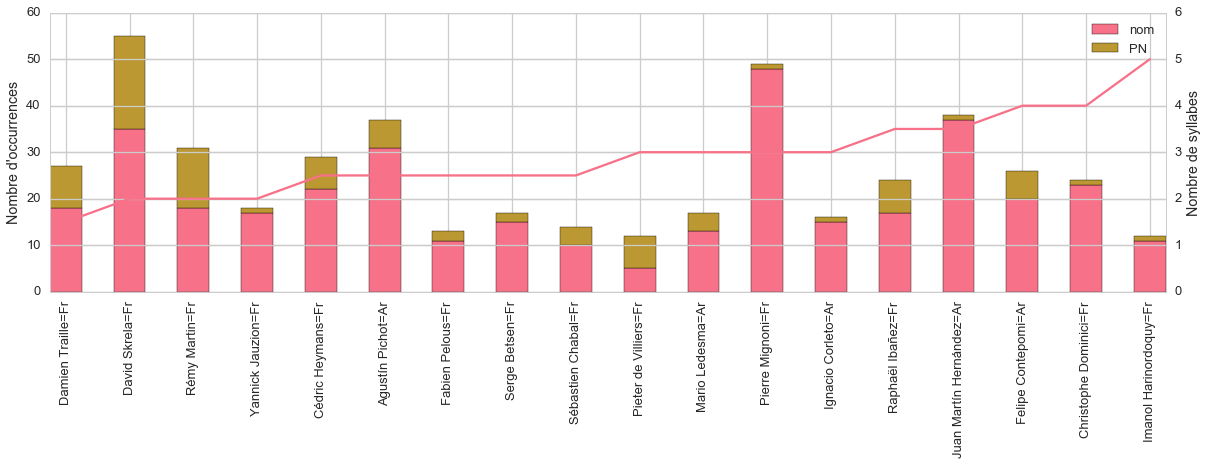

In [663]:
title=u"DistributionDénominationsJoueurs-Long-Nom"
dfAX=dfJoueurs[dfJoueurs.index.isin(joueursSyllabes)].sort_values("nbSyllNom",ascending=True)
fig = plt.figure()
ax=dfAX[["nom","PN"]].plot(kind="bar",stacked=True,figsize=(20,5))
ax.set_ylim((0, 60))
ax.set_ylabel("Nombre d'occurrences")
ax2 = ax.twinx()
ax2.plot(dfAX[["nbSyllNom"]].values)
ax2.set_ylim((0, 6))
ax2.set_ylabel('Nombre de syllabes')
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

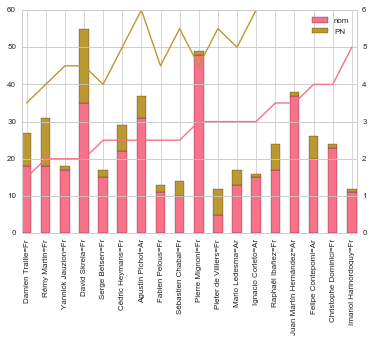

In [357]:
title=u"DistributionDénominationsJoueurs-longNomTotal"
dfAX=dfJoueurs[dfJoueurs.index.isin(joueursSyllabes)].sort_values("nbSyllNom",ascending=True)
fig = plt.figure()
ax=dfAX[["nom","PN"]].plot(kind="bar",stacked=True)
ax2 = ax.twinx()
ax2.plot(dfAX[["nbSyllNom","nbSyll"]].values)
ax2.set_ylim((0, 6))
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

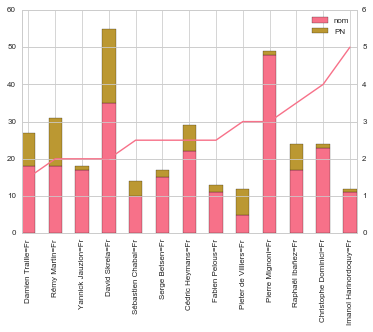

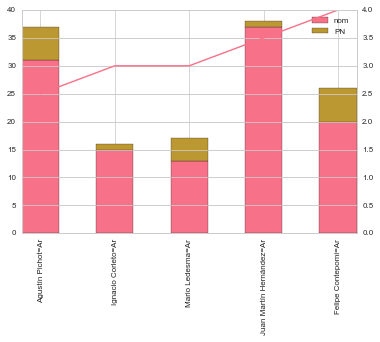

In [347]:
for equipe in ["Fr","Ar"]:
    title=u"DistributionDénominationsJoueurs-longNom-Equipe%s"%equipe
    dfAX=dfJoueurs[(dfJoueurs.index.isin(joueursSyllabes))&(dfJoueurs["equipe"]==equipe)].sort_values("nbSyllNom",ascending=True)
    fig = plt.figure()
    ax=dfAX[["nom","PN"]].plot(kind="bar",stacked=True)
    ax2 = ax.twinx()
    ax2.plot(dfAX[["nbSyllNom"]].values)
    yAX=ax.get_ylim()
    ax2.set_ylim((0, yAX[1]/10))
    plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
    plt.show()

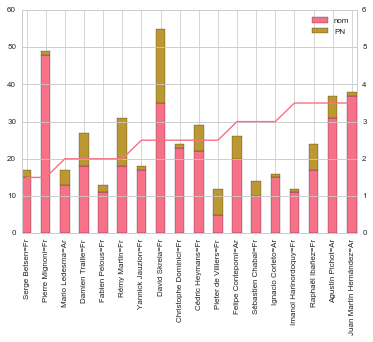

In [310]:
title=u"DistributionDénominationsJoueurs-longPrenom"
dfAX=dfJoueurs[dfJoueurs.index.isin(joueursSyllabes)].sort_values("nbSyllPrenom",ascending=True)
fig = plt.figure()
ax=dfAX[["nom","PN"]].plot(kind="bar",stacked=True)
ax2 = ax.twinx()
ax2.plot(dfAX[["nbSyllPrenom"]].values)
ax2.set_ylim((0, 6))
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

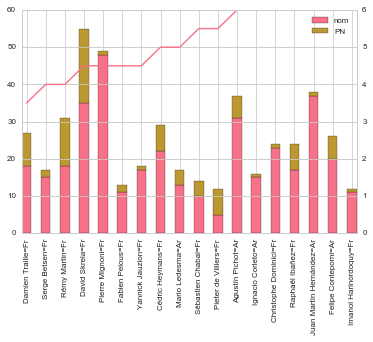

In [315]:
title=u"DistributionDénominationsJoueurs-long"
dfAX=dfJoueurs[dfJoueurs.index.isin(joueursSyllabes)].sort_values("nbSyll",ascending=True)
fig = plt.figure()
ax=dfAX[["nom","PN"]].plot(kind="bar",stacked=True)
ax2 = ax.twinx()
ax2.plot(dfAX[["nbSyll"]].values)
ax2.set_ylim((0, 6))
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

# Dénominations par équipe

In [667]:
dfJoueurs["equipe"]=dfJoueurs.index.str.split("=").str[1]
dfJoueurs

nom  PN prénom NN total    pPrénom      pNom  \
Ignacio Corleto=Ar              15   1      0  0    16          0    0.9375   
Pieter de Villiers=Fr            5   7      0  0    12          0  0.416667   
Rémy Martin=Fr                  18  13      1  0    32    0.03125    0.5625   
Yannick Jauzion=Fr              17   1      0  0    18          0  0.944444   
Julien Bonnaire=Fr               0   1      0  0     1          0         0   
Manuel Contepomi=Ar              2   0      0  0     2          0         1   
Juan Manuel Leguizamón=Ar        4   0      0  0     4          0         1   
Jo Maso=Fr                       1   0      0  0     1          0         1   
Jérôme Thion=Fr                  4   2      0  0     6          0  0.666667   
Jean-Baptiste Élissalde=Fr       0   1      0  0     1          0         0   
Sébastien Chabal=Fr             10   4      0  0    14          0  0.714286   
Serge Betsen=Fr                 15   2      1  0    18  0.0555556  0.833333   
Ignacio Fernández Lobbe=Ar       0   0      0  1     1          0         0   
Frédéric Michalak=Fr             2   2      0  0     4          0       0.5   
Olivier Milloud=Fr               0   1      1  0     2        0.5         0   
Martín Scelzo=Ar                 2   0      0  0     2          0         1   
Juan Martín Fernández Lobbe=Ar   0   0      0  9     9          0         0   
Patricio Albacete=Ar             1   0      0  0     1          0         1   
Imanol Harinordoquy=Fr          11   1      0  0    12          0  0.916667   
Damien Traille=Fr               18   9      0  0    27          0  0.666667   
David Ellis=En                   0   1      0  0     1          0         0   
Lucas Borges=Ar                  7   3      0  0    10          0       0.7   
Lucas Ostiglia=Ar                3   0      0  0     3          0         1   
Rodrigo Roncero=Ar               5   1      0  0     6          0  0.833333   
David Skrela=Fr                 35  20      2  0    57  0.0350877  0.614035   
Marcelo Loffreda=Ar              1   0      0  0     1          0         1   
Christophe Dominici=Fr          23   1      0  0    24          0  0.958333   
Raphaël Ibañez=Fr               17   7      1  0    25       0.04      0.68   
Bernard Laporte=Fr               2   7      1  0    10        0.1       0.2   
Agustín Pichot=Ar               31   6      0  0    37          0  0.837838   
Rimas Álvarez Kairelis=Ar        0   0      0  2     2          0         0   
Cédric Heymans=Fr               22   7      0  0    29          0  0.758621   
Mario Ledesma=Ar                13   4      1  0    18  0.0555556  0.722222   
Hernán Senillosa=Ar              3   0      0  0     3          0         1   
Juan Martín Hernández=Ar        37   1      0  0    38          0  0.973684   
Thierry Dusautoir=Fr             1   1      0  0     2          0       0.5   
Aurélien Rougerie=Fr             9   0      0  0     9          0         1   
Pierre Mignoni=Fr               48   1      0  0    49          0  0.979592   
Felipe Contepomi=Ar             20   6      0  0    26          0  0.769231   
Jean-Baptiste Poux=Fr            0   1      0  0     1          0         0   
Fabien Pelous=Fr                11   2      2  0    15   0.133333  0.733333   
Dimitri Szarzewski=Fr            4   2      0  0     6          0  0.666667   

                                      pPN pNN  nbSyllPrenom  nbSyllNom  \
Ignacio Corleto=Ar                 0.0625   0           3.0        3.0   
Pieter de Villiers=Fr            0.583333   0           2.5        3.0   
Rémy Martin=Fr                    0.40625   0           2.0        2.0   
Yannick Jauzion=Fr              0.0555556   0           2.5        2.0   
Julien Bonnaire=Fr                      1   0           NaN        NaN   
Manuel Contepomi=Ar                     0   0           NaN        NaN   
Juan Manuel Leguizamón=Ar               0   0           NaN        NaN   
Jo Maso=Fr                              0

In [668]:
dfEquipes=dfJoueurs.groupby("equipe")[u"nom PN prénom NN".split(" ")].sum().T
dfEquipes=dfEquipes[["Fr","Ar"]]
dfEquipes

equipe   Fr   Ar
nom     273  144
PN       93   22
prénom    9    1
NN        0   12

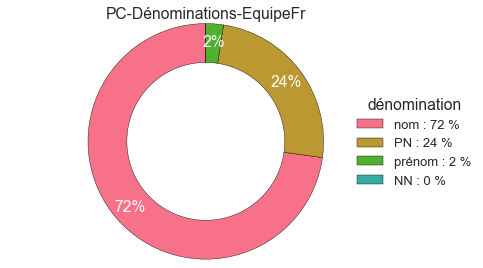

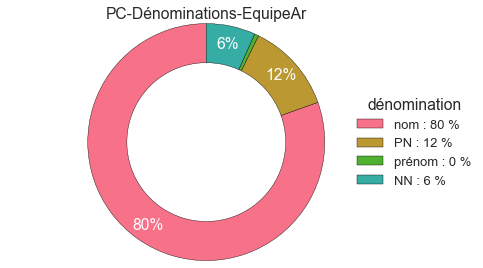

In [670]:
for equipe in dfEquipes.columns:
    donut(dfEquipes,equipe,None,u"nom PN prénom NN".split(" "),u"PC-Dénominations-Equipe%s"%equipe,pctMin=1)

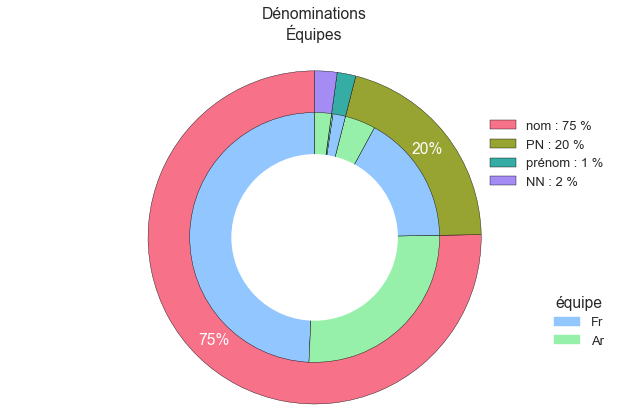

In [684]:
subWedges=[r.tolist() for ix,r in dfEquipes.T.iterrows()]
dfAX=pd.DataFrame(dfEquipes.T[u"nom PN prénom NN".split(" ")].sum())
donuts(dfAX,0,u"nom PN prénom NN".split(" "),
       ["Fr","Ar"],subWedges,
       u"Dénominations\nÉquipes",prepSub=0,
       intPalette="pastel",
       figsize=(9,6),
       titreIntLegend=u"équipe",
       pctMin=2,
      )

# Prénom Nom

In [96]:
dfPN=dfNomsMatch[(dfNomsMatch["PN"].notnull())&(dfNomsMatch["PN"]!=0)]["texte noms joueurs RJ5 D5 Spk texte-PxP texte-colour".split(" ")]

In [97]:
dfPN.groupby(["joueurs","noms","Spk"]).count()

texte  \
joueurs                                            noms                                               Spk           
Agustín Pichot=Ar                                  Agustin Pichot                                     spk1      2   
                                                                                                      spk2      3   
                                                                                                      spk3      1   
Bernard Laporte=Fr                                 Bernard Laporte                                    spk1      3   
                                                                                                      spk2      1   
                                                   Bernard Laporte,Bernard                            spk2      1   
Christophe Dominici=Fr                             Christophe Dominici                                spk1      1   
Cédric Heymans=Fr                                  Cédric Heymans                                     spk1      5   
Cédric Heymans=Fr;Thierry Gilardi=Ot;Frédéric M... Thierry,Cédric Heymans,Fred Michalak               spk3      1   
Damien Traille=Fr                                  Damien Traille                                     spk1      4   
                                                                                                      spk3      3   
Damien Traille=Fr;Cédric Heymans=Fr                Damien Traille,Cédric Heymans                      spk1      1   
Damien Traille=Fr;Pierre Mignoni=Fr                Mignoni,Damien Traille                             spk1      1   
Damien Traille=Fr;Rémy Martin=Fr                   Traille,Rémy Martin                                spk2      1   
David Skrela=Fr                                    David Skrela                                       spk1     18   
                                                                                                      spk3      2   
David Skrela=Fr;Bernard Laporte=Fr                 Bernard Laporte,Skrela                             spk2      1   
Dimitri Szarzewski=Fr                              Dimitri Szarzewski                                 spk1      1   
Fabien Pelous=Fr                                   Fabien Pelous                                      spk1      1   
Fabien Pelous=Fr;Rémy Martin=Fr;Raphaël Ibañez=Fr  Ibañez,Rémy Martin,Fabien Pelous                   spk1      1   
Felipe Contepomi=Ar                                Felipe Contepomi                                   spk1      5   
Frédéric Michalak=Fr                               Frédéric Michalak                                  spk1      1   
Frédéric Michalak=Fr;Thierry Gilardi=Ot            Thierry,Frédéric Michalak                          spk3      1   
Ignacio Corleto=Ar                                 Ignacio Corleto                                    spk1      1   
Imanol Harinordoquy=Fr                             Imanol Harinordoquy                                spk1      1   
Jean-Baptiste Poux=Fr                              Jean-Baptiste Poux                                 spk3      1   
Jean-Baptiste Élissalde=Fr                         Jean-Baptiste Elissalde                            spk1      1   
Jo Maso=Fr;Bernard Laporte=Fr                      Maso,Bernard Laporte                               spk1      1   
Juan Martín Hernández=Ar                           Juan Martin Hernandez                              spk1      1   
Julien Bonnaire=Fr;Sébastien Chabal=Fr;Dimitri ... Sébastien Chabal,Julien Bonnaire,Dimitri Szarze... spk3      1   
Jérôme Thion=Fr                                    Jérôme Thion                                       spk1      2   
Lucas Borges=Ar                                    Lucas Borges                                       spk1      3   
Mario Ledesma=Ar                                   Mario Ledesma                                      spk1      3   
             

# Graphiques

## Corrélation Entités nommées

In [72]:
print
dfTemp=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][["noms","début","fin","excitation","texte","discours","Spk","RJ5.00","D5.00"]]
for ix,row in dfTemp.iloc[:250].iterrows():
    print ix,row[["discours","noms","excitation","Spk","RJ5.00","D5.00"]].tolist()



3616.0 [u'narration', u'David Skrela', 2.0, u'spk1', 0.58, 3.68]
4232.0 [u'narration suspensive', u'Roncero', 2.0, u'spk1', 3.0, 3.268]
4456.0 [u'narration', u'Pichot', 2.0, u'spk1', 3.56, 3.056]
4656.0 ['narration suspensive', u'Hernandez', 2.0, u'spk1', 4.5, 2.944]
7144.0 [u'narration', u'Rapha\xebl Iba\xf1ez', 2.0, u'spk1', 0.0, 2.944]
8120.0 [u'narration', u'Pichot', 2.0, u'spk1', 3.1, 3.18]
8472.0 [u'narration suspensive', u'C\xe9dric Heymans', 2.0, u'spk1', 4.0, 3.672]
8844.0 [u'narration', u'Pichot', 2.0, u'spk1', 4.28, 3.764]
9092.0 ['narration', u'Heymans', 2.0, u'spk1', 3.0, 3.992]
9596.0 ['narration', u'David Skrela', 2.0, u'spk1', 3.96, 3.212]
9920.0 ['invocation', u'Thierry', 0.0, u'spk3', 2.5, 3.94]
10000.0 ['explication', u'Agustin Pichot', 2.0, u'spk2', 2.5, 4.1]
11104.0 [u'explication', u'Heymans', 2.0, u'spk2', 0.5, 5.916]
11740.0 [u'narration', u'Ledesma', 0.0, u'spk2', 0.5, 6.5]
11872.0 ['invocation,narration', u'Mario Ledesma,Mario', 2.0, u'spk1', 0.5, 5.768]
1356

150720.0 ['narration', u'Pichot', 2.0, u'spk1', 5.8, 3.14]
150948.0 [u'narration suspensive', u'Borges', 2.0, u'spk1', 5.5, 3.308]
151164.0 [u'narration', u'Heymans', 2.0, u'spk1', 6.0, 2.216]
151700.0 [u'narration', u'Corleto', 2.0, u'spk1', 3.5, 1.5]
152056.0 [u'narration', u'Contepomi', 4.0, u'spk1', 2.5, 2.112]
152388.0 ['narration', u'Jauzion', 4.0, u'spk1', 1.94, 2.748]
154324.0 ['narration suspensive', u'Contepomi', 2.0, u'spk1', 0.0, 6.424]
155304.0 [u'point de vue', u'Thierry', 2.0, u'spk2', 0.5, 5.896]
158136.0 ['narration', u'Felipe Contepomi', 0.0, u'spk1', 0.8200000000000001, 4.264]
160516.0 ['invocation', u'Thierry', 0.0, u'spk3', 1.0, 3.1]
160583.0 ['description', u'Damien Traille', 0.0, u'spk3', 1.0, 3.1]
160679.0 [u'description,explication', u'Fred Michalak', 0.0, u'spk3', 1.0, 3.495]
161304.0 [u'explication', u'David Skrela', 0.0, u'spk1', 0.98, 4.688000000000001]
161824.0 ['explication', u'Jauzion,Traille', 0.0, u'spk1', 0.88, 4.044]
161952.0 [u'narration suspensive'

# Graphe F0

In [46]:
dfF0Base=pd.read_csv("France_Argentine_Intro_FR-rawf0.csv",sep="\t")
dfF0Base.columns="label timeline f0".split(" ")

In [48]:
dfF0=dfF0Base[["timeline","f0"]]
dfF0["f0"]=pd.to_numeric(dfF0["f0"], errors='coerce')

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [49]:
dfF0=dfF0.set_index("timeline")

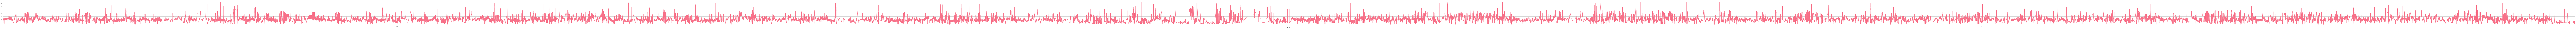

In [50]:
dfF0.plot(figsize=(500,5))

David Skrela 3616.0


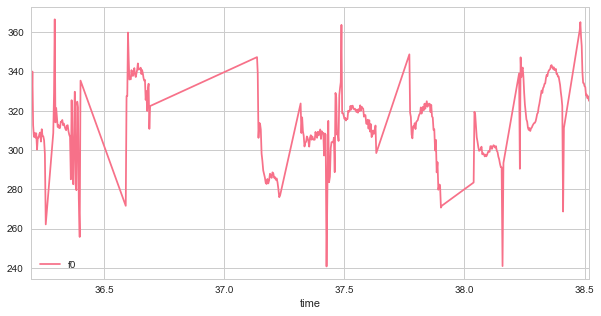

Roncero 4232.0


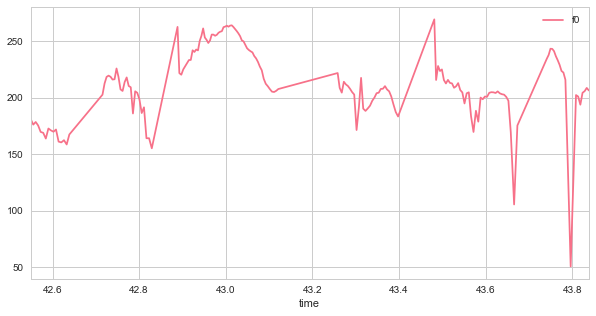

Pichot 4456.0


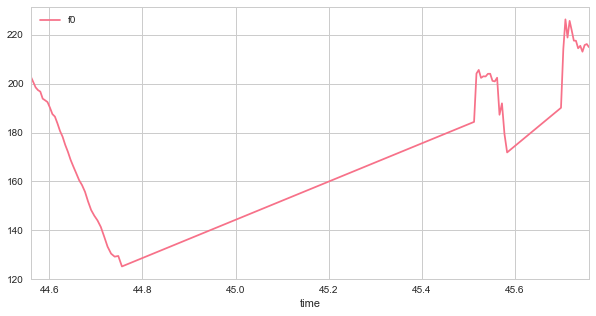

Hernandez 4656.0


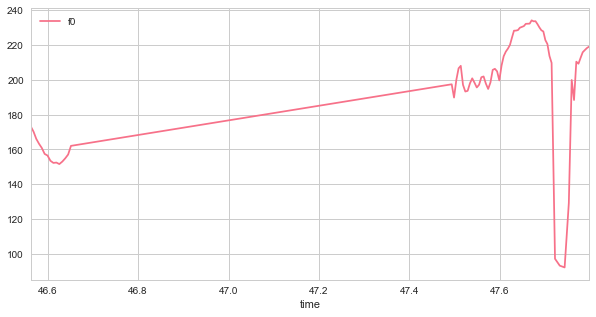

Raphaël Ibañez 7144.0


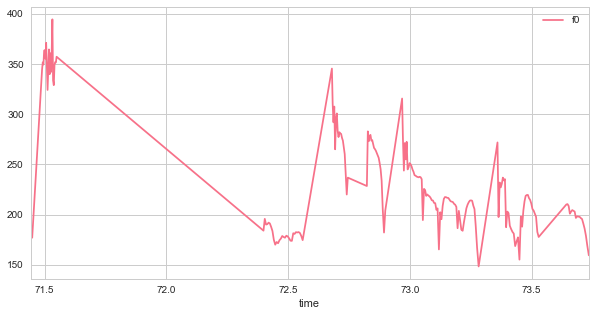

Pichot 8120.0


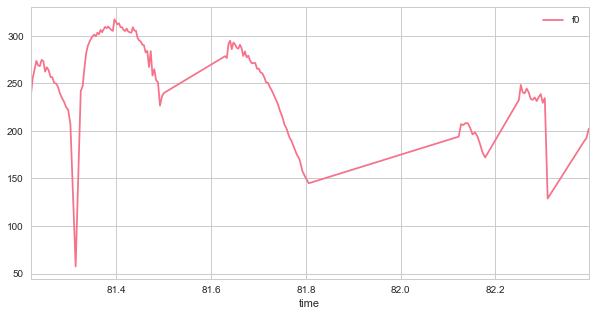

Cédric Heymans 8472.0


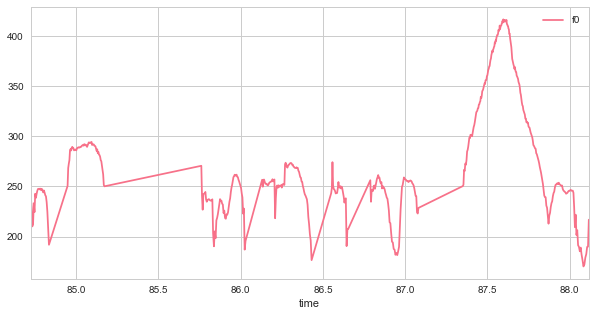

Pichot 8844.0


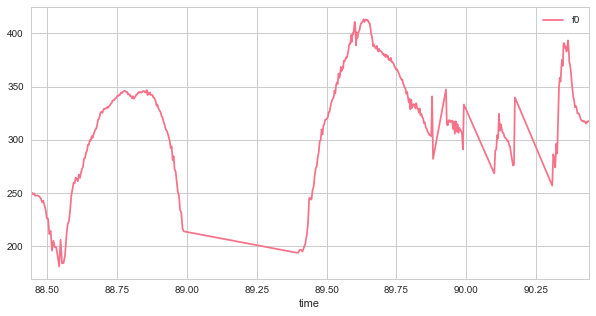

Heymans 9092.0


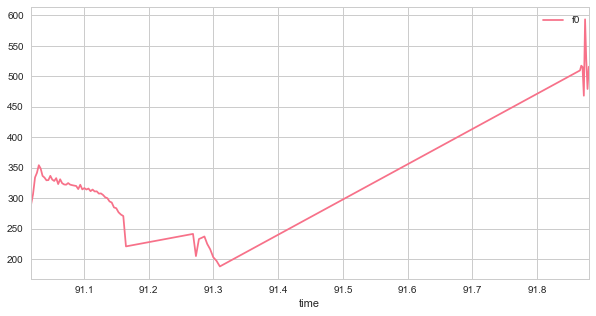

David Skrela 9596.0


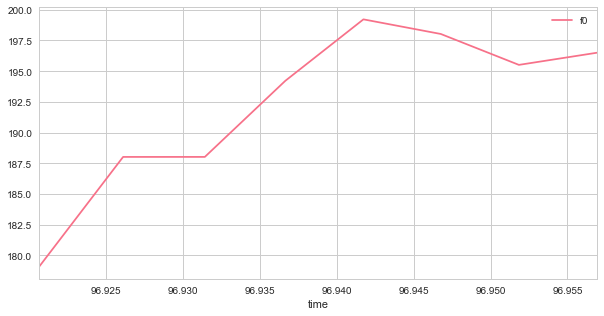

Thierry 9920.0


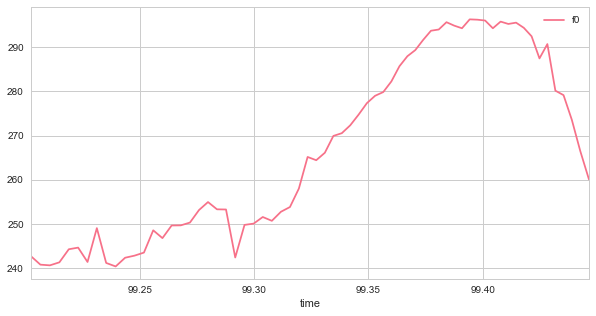

Agustin Pichot 10000.0


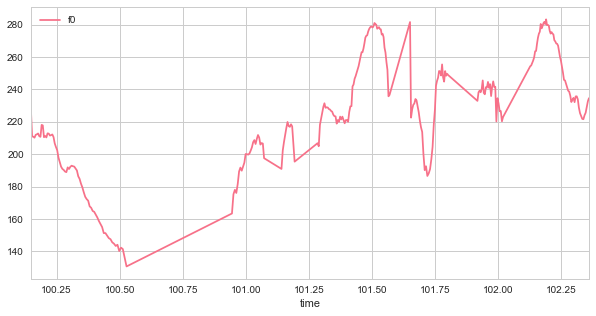

Heymans 11104.0


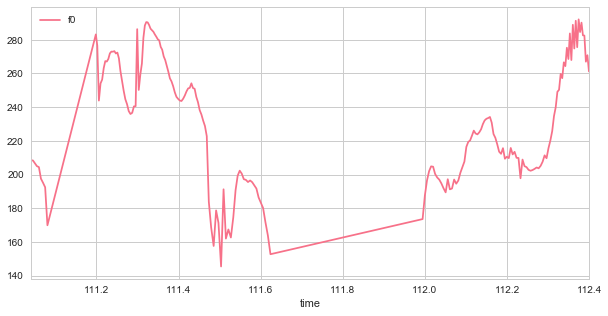

Ledesma 11740.0


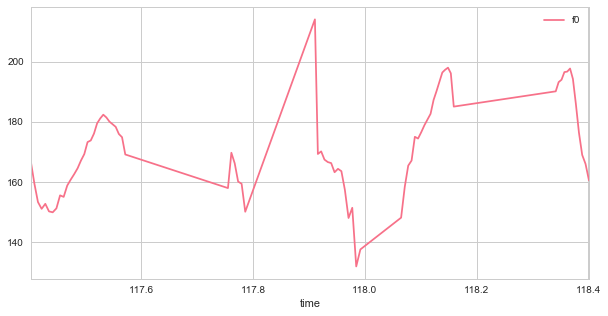

Mario Ledesma,Mario 11872.0


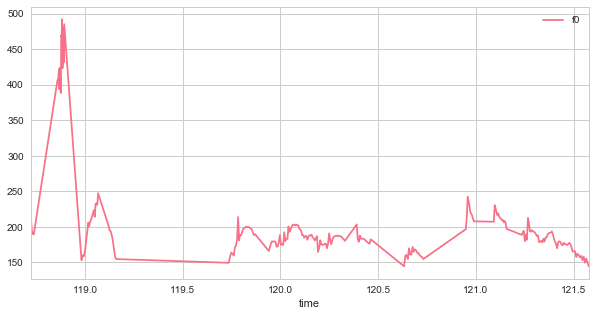

Ledesma 13568.0


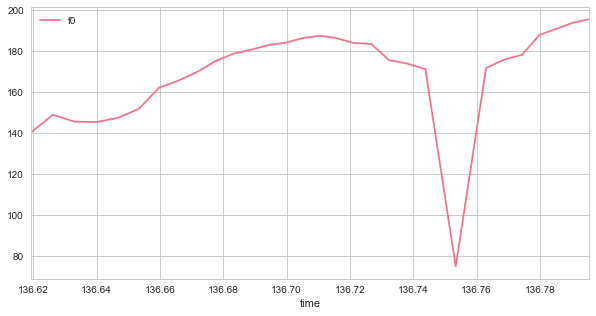

Hernandez 14360.0


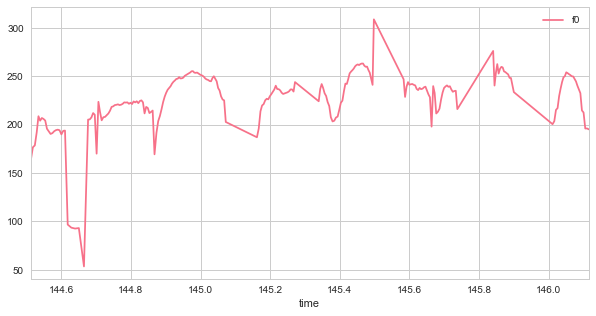

Cédric Heymans 14744.0


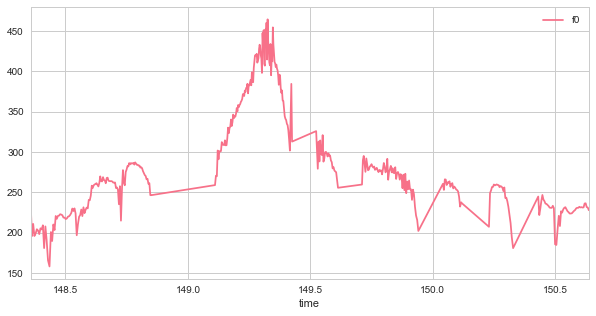

Juan Martin Hernandez 16056.0


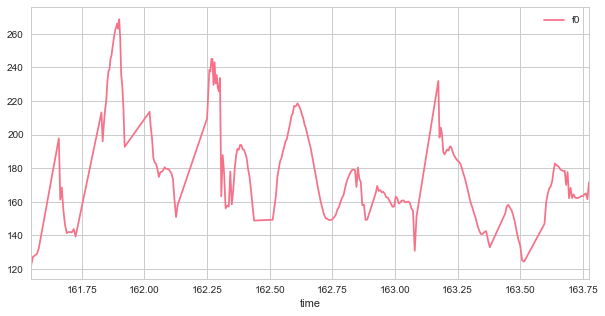

Cédric Heymans 16480.0


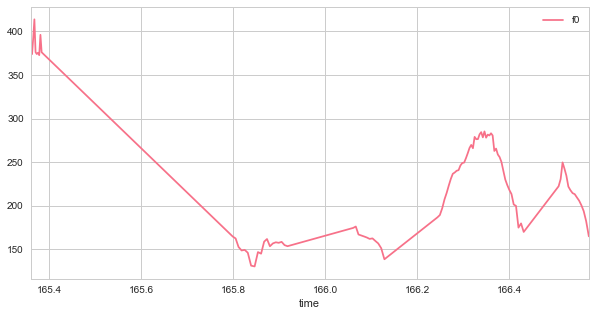

Hernandez 18164.0


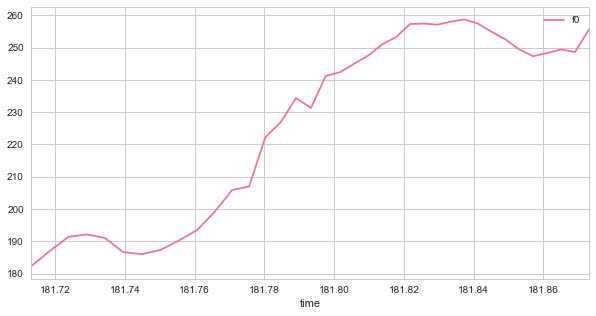

Mario Ledesma 19068.0


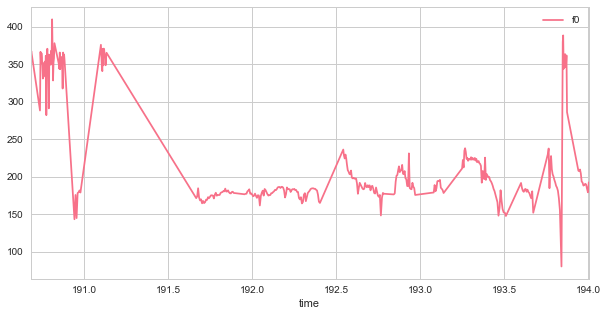

Rémy Martin 19872.0


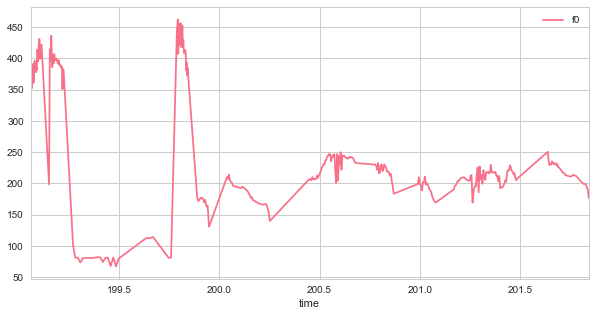

Albacete 20468.0


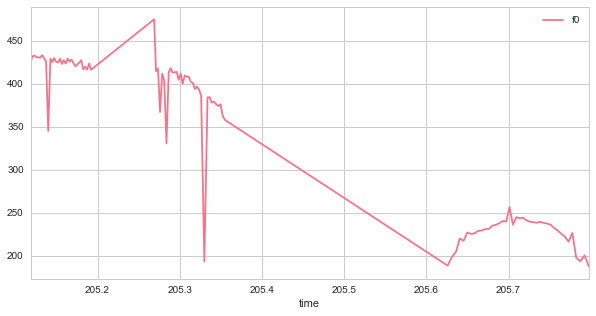

Fernandez Lobbe 20716.0


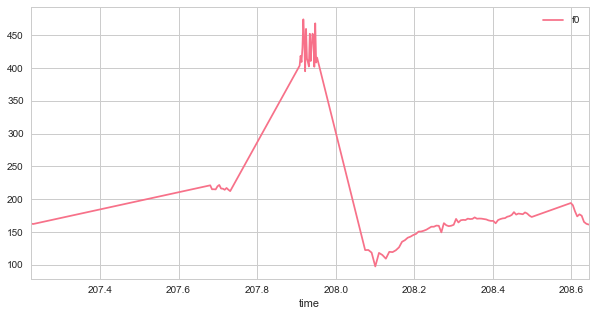

In [35]:
dfTemp=dfNomsMatch[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch[joueur]!="0,0,0,0")][["noms",joueur,"début","fin"]]
for ix,row in dfTemp.iloc[:25].iterrows():
    print row["noms"],ix
    try:
        ax=dfF0[(dfF0.index>=row["début"])&(dfF0.index<=row["fin"])].plot(figsize=(10,5))
        plt.show()
    except:
        pass